# Overview

This code contains three key sections: Sections 3 and 4 contain the *preliminary and confirmatory analysis* and Section 5 contains an exploratory third analysis that forms part of the study's integration and discussion

3.   Section 3: Exploratory Data Analysis
4.   Section 4: Confirmatory Tests (Study 1 and Study 2)
5.   Section 5: Hierarchical Clustering of Policy Domains


In some cases the file may not run properly if opened on a desktop python kernel, as Jupyter was used as a terminal to create this file. In that case, the file can be accessed by uploading and viewing through Google Colab, where it was originally written.





In [ ]:
# First,we install primary packages for data cleaning and transformation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
import joblib
import json

In [ ]:
# Next, this project uses Google Colab's Jupyter Terminal to run the code, it requires connection to a Google Drive
# NB: In order to run this code on another computer or terminal, this code chunk can be excluded, and the subsequent code chunk should just have the file address replaced with the one in your system

from google.colab import drive
import pandas as pd

# Mounting Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## Section 3: Initial Exploratory Data Analysis

<ipython-input-73-ffafe6d3a32b>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eurostat_eu[migration_years] = eurostat_eu[migration_years].replace({':': np.nan}).astype(float)


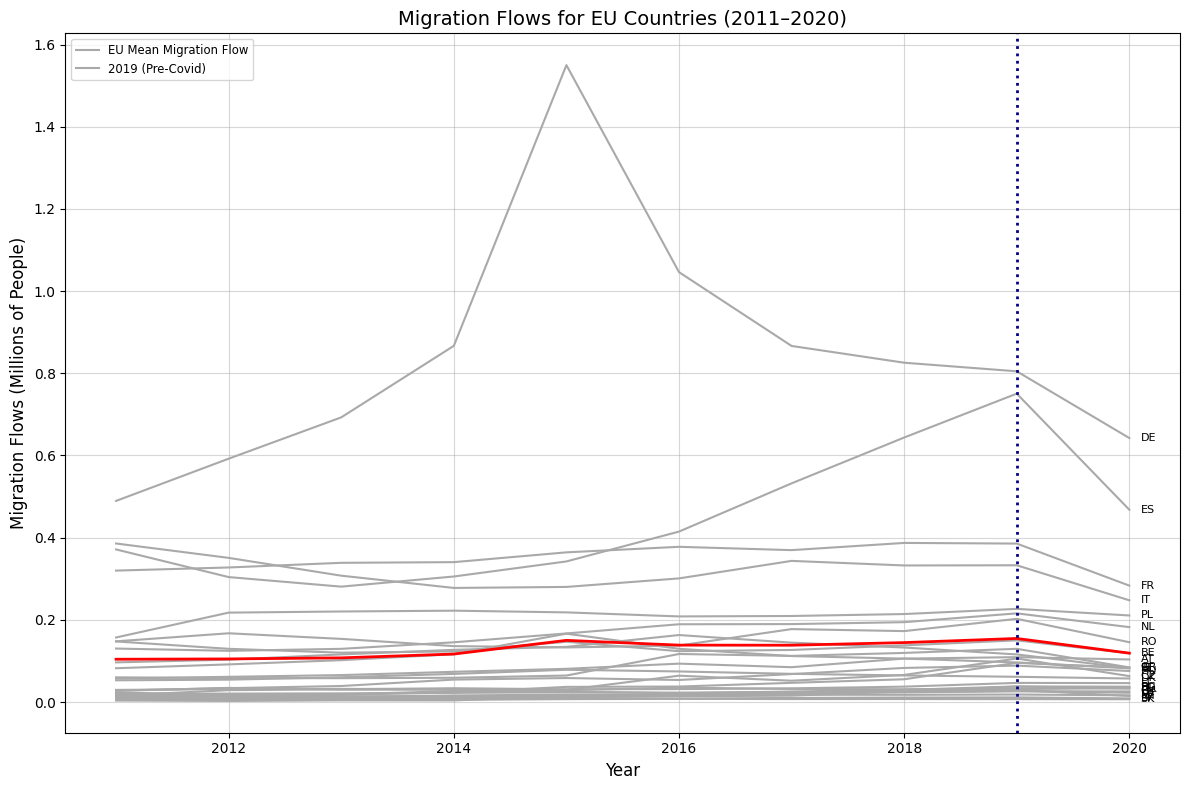

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading the Eurostat dataset
eurostat_data = pd.read_excel('/content/drive/My Drive/PB310/eurostat_eu_cleaned.xlsx')

# Filtering for only EU countries
eu_country_codes = [
    'AT', 'BE', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'GR',
    'HU', 'IE', 'IT', 'LV', 'LT', 'LU', 'MT', 'NL', 'PL', 'PT', 'RO', 'SK',
    'SI', 'ES', 'SE'
]
eurostat_eu = eurostat_data[eurostat_data['country_code'].isin(eu_country_codes)]

# Replace non-numeric values in migration flow columns with NaN and convert to float
migration_years = [str(year) for year in range(2011, 2021)]  # Limit to 2011–2020
eurostat_eu[migration_years] = eurostat_eu[migration_years].replace({':': np.nan}).astype(float)

# Convert values to millions for better scaling
eurostat_eu[migration_years] = eurostat_eu[migration_years] / 1_000_000

# Plotting all countries' migration flows on a single plot
plt.figure(figsize=(12, 8))

# Plot each country's migration flow
for country_code in eu_country_codes:
    country_data = eurostat_eu[eurostat_eu['country_code'] == country_code]
    migration_flows = country_data[migration_years].iloc[0].values
    plt.plot(range(2011, 2021), migration_flows, color='darkgrey', linewidth=1.5)
    # Add country code next to the last data point of each line for interpretation
    plt.text(2020.1, migration_flows[-1], country_code, fontsize=8, color='black', verticalalignment='center')

# mean migration flow across all countries
mean_migration_flow = eurostat_eu[migration_years].mean()
plt.plot(range(2011, 2021), mean_migration_flow, color='red', linewidth=2, label='EU Mean Migration Flow')

# vertical line to mark data end
plt.axvline(x=2019, color='darkblue', linestyle='dotted', linewidth=2, label='2019 (End)')

# Final plot adjustments
plt.title('Migration Flows for EU Countries (2011–2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Migration Flows (Millions of People)', fontsize=12)
plt.legend(['EU Mean Migration Flow', '2019 (Pre-Covid)'], loc='upper left', fontsize='small')
plt.grid(True, alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


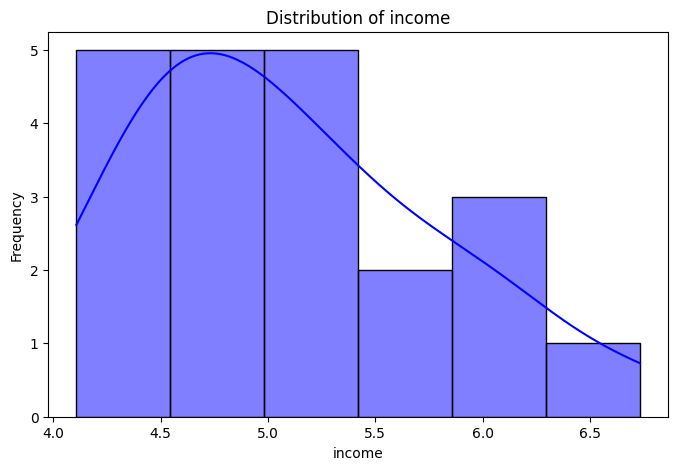

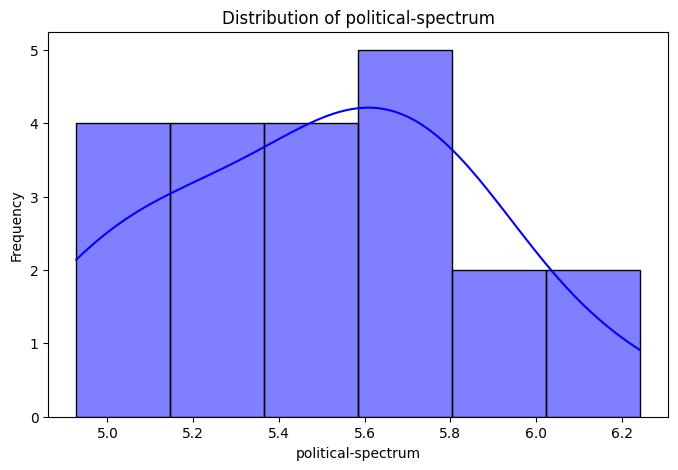

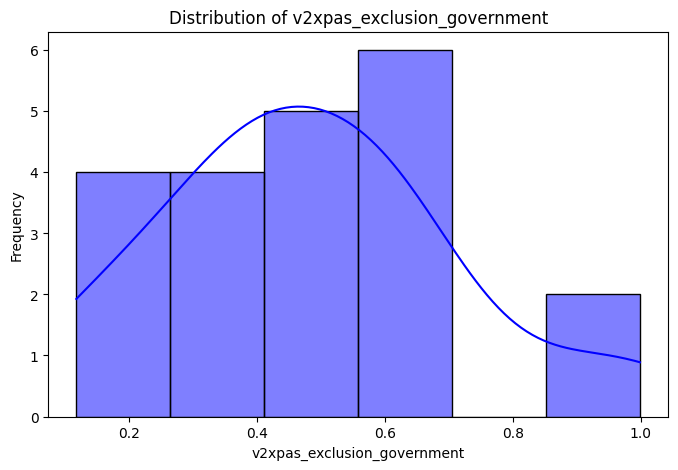

In [ ]:
## Visualising some continuous variables

# Visualize distributions
variables_to_plot = ['income', 'political-spectrum', 'v2xpas_exclusion_government']
for variable in variables_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(final_combined_dataset[variable], kde=True, color='blue')
    plt.title(f"Distribution of {variable}")
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()


Grouped Means by Country:
                income  v2smpolhate
country_code                       
AT            4.688202      -0.8365
BG            4.509004      -0.1200
CZ            5.163106       0.8360
DE            5.493176       0.7250
DK            6.079526       1.8820
EE            4.484298       1.1350
ES            4.667615       0.3850
FI            5.927273       1.5100
FR            4.678070       1.1260
HR            6.088394       0.0740
HU            5.088756      -1.9560
IT            4.699914      -0.4220
LT            5.349233       2.9300
LV            4.258851       1.4480
NL            5.604681       0.5790
PL            4.996577      -1.7060
PT            4.693436       1.2920
RO            4.107065       0.9980
SE            6.733037       1.9430
SI            5.195719      -0.6460
SK            4.304774      -0.7880


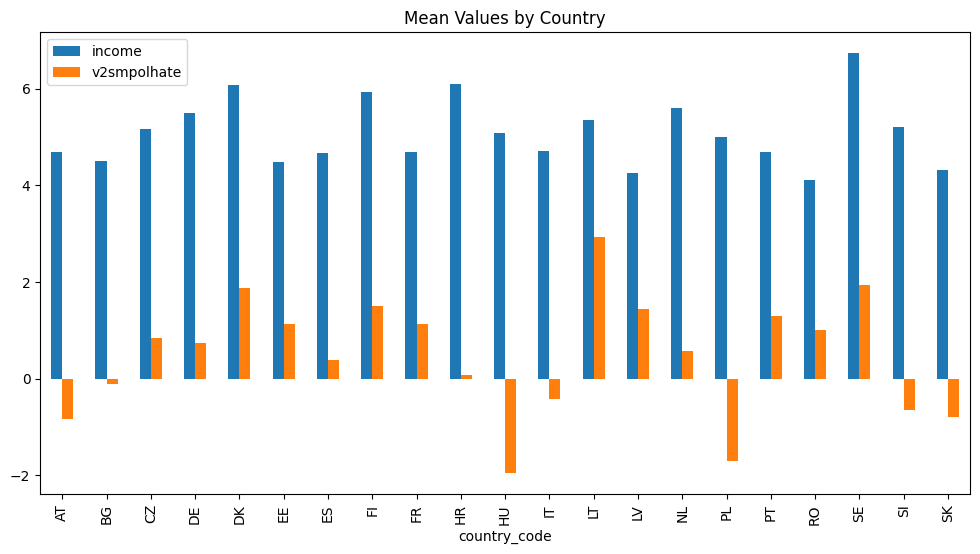

In [ ]:
# Grouped means by country
grouped_means = final_combined_dataset.groupby('country_code')[['income', 'v2smpolhate']].mean()
print("Grouped Means by Country:")
print(grouped_means)

# Visualize means by country
grouped_means.plot(kind='bar', figsize=(12, 6), title="Mean Values by Country")
plt.show()


In [ ]:
# Checking variable distributions  and histograms for EVS variables

# Loading the imputed dataset
file_path = '/content/drive/My Drive/PB310/EVS_Iterative_Imputed.xlsx'
evs_data = pd.read_excel(file_path)

# Selecting the variables of interest for the missing values check
variables_to_check = [
    'party_support', 'political-spectrum', 'income', 'immig_culture',
    'education', 'immig_neighbours', 'immig_welfare', 'immig_crime',
    'immig_development', 'immig_steal_jobs', 'immig_concern', 'employment',
    'immig_job_priority', 'religion', 'age', 'sex', 'lineage_m', 'lineage_f', 'citizen'
]

missing_summary = evs_data[variables_to_check].isnull().sum()
missing_table = pd.DataFrame({
    'Variable': variables_to_check,
    'Missing Count': missing_summary.values,
    'Missing Percent (%)': (missing_summary / len(evs_data) * 100).values
}).sort_values(by='Missing Percent (%)', ascending=False)


# Generating histograms for the selected variables in a 4x4 grid
plt.figure(figsize=(20, 16))  # Adjust the figure size
for i, column in enumerate(variables_to_check, 1):
    plt.subplot(4, 5, i)
    evs_data[column].hist(bins=10, color='darkred', edgecolor='black')
    plt.title(column, fontsize=10)
    plt.xlabel('Values', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle("Histograms of EVS Variables", fontsize=16, y=1.02)
plt.show()



<ipython-input-25-90e34ee594aa>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-25-90e34ee594aa>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-25-90e34ee594aa>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-25-90e34ee594aa>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-25-90e34ee594aa>:25: FutureWarning: 

Passing `pa

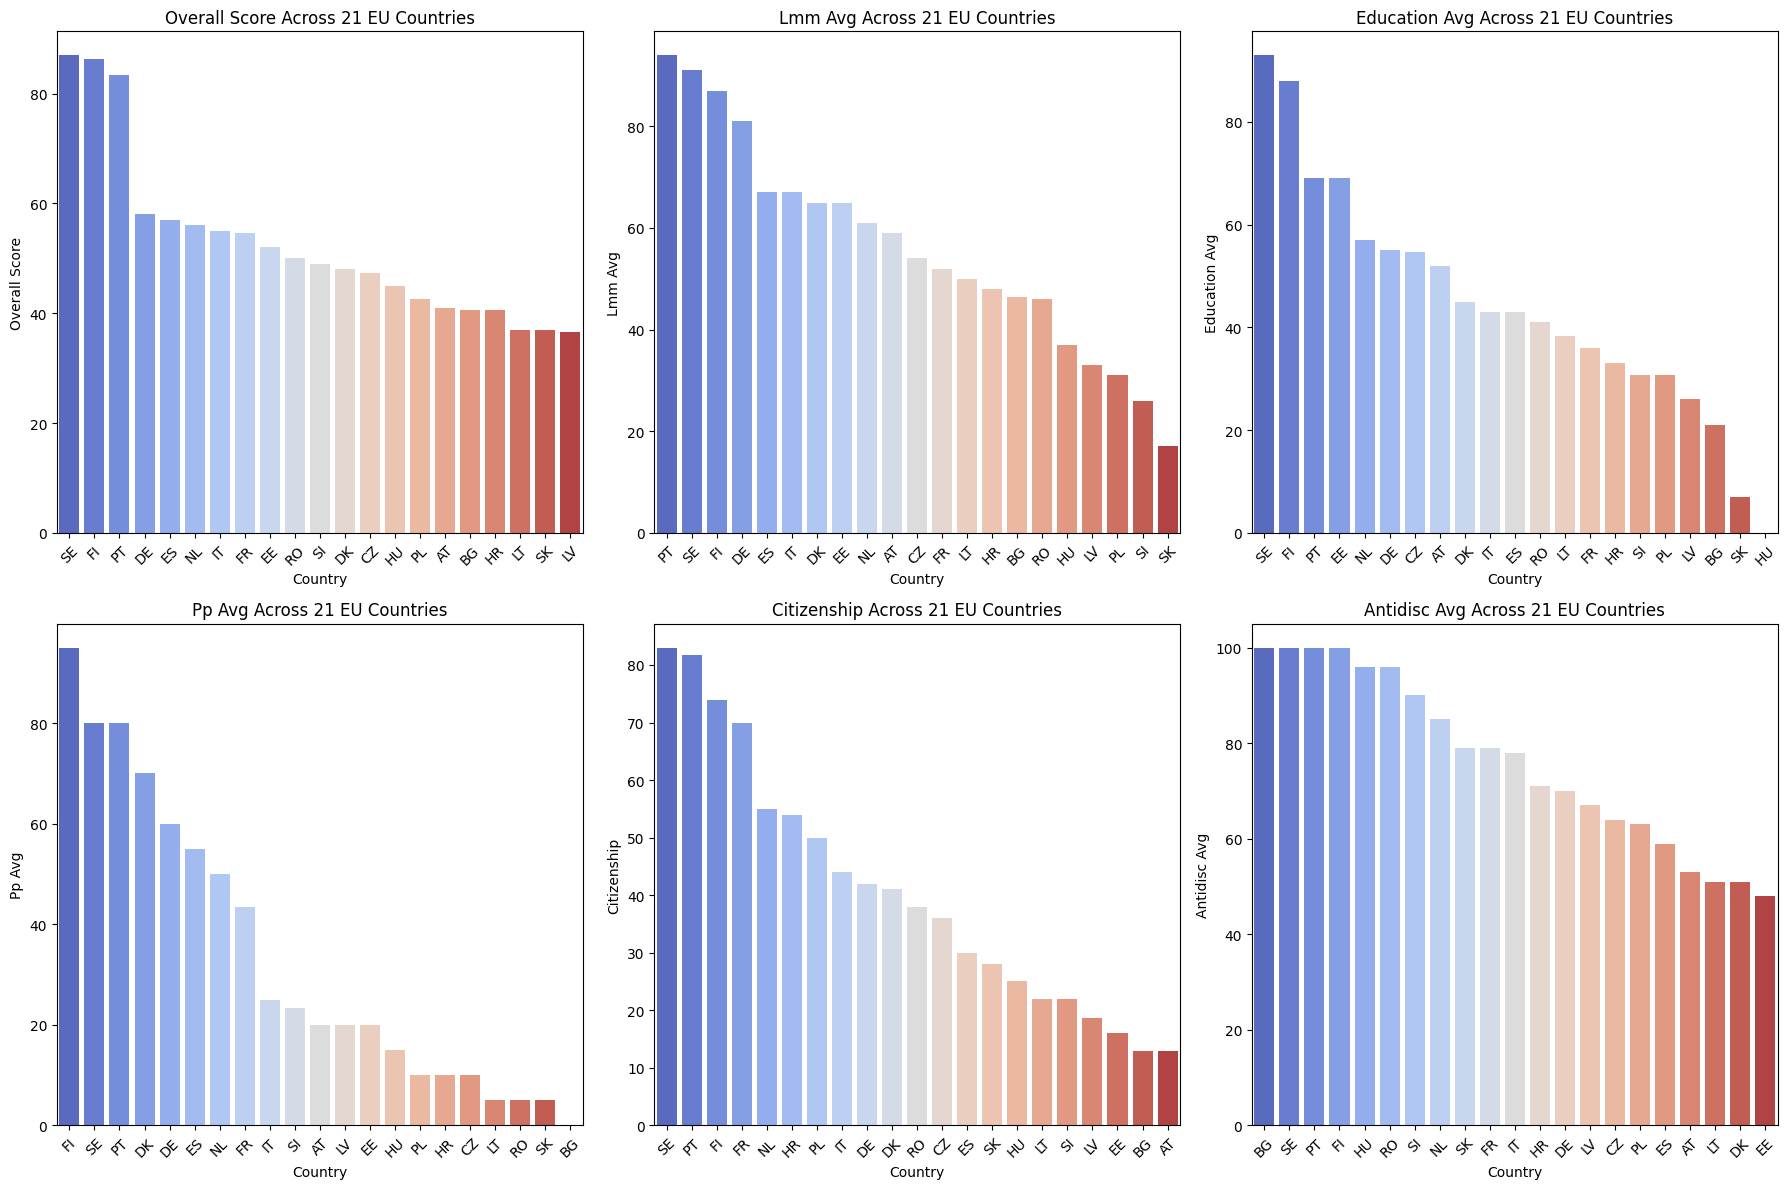

In [ ]:
## Conducting some exploratory analyses for MIPEX data

# Load the aggregated MIPEX dataset
mipex_path = '/content/drive/My Drive/PB310/Aggregated-MIPEX.xlsx'
aggregated_mipex = pd.read_excel(mipex_path)

# Filter for the 21 EU countries
eu_countries = [
    'AT', 'BG', 'HR', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'HU',
    'IT', 'LV', 'LT', 'NL', 'PL', 'PT', 'RO', 'SK', 'SI', 'ES', 'SE'
]
mipex_eu = aggregated_mipex[aggregated_mipex['country_code'].isin(eu_countries)]

# Relevant columns for visualization
columns_to_plot = ['overall_score', 'lmm_avg', 'education_avg', 'pp_avg', 'citizenship', 'antidisc_avg']

# Set up a 6x4 grid for the plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot each domain with countries
for i, column in enumerate(columns_to_plot):
    sns.barplot(
        data=mipex_eu.sort_values(column, ascending=False),
        x='country_code',
        y=column,
        palette='coolwarm',
        ax=axes[i]
    )
    axes[i].set_title(f"{column.replace('_', ' ').title()} Across 21 EU Countries", fontsize=12)
    axes[i].set_xlabel("Country", fontsize=10)
    axes[i].set_ylabel(column.replace('_', ' ').title(), fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


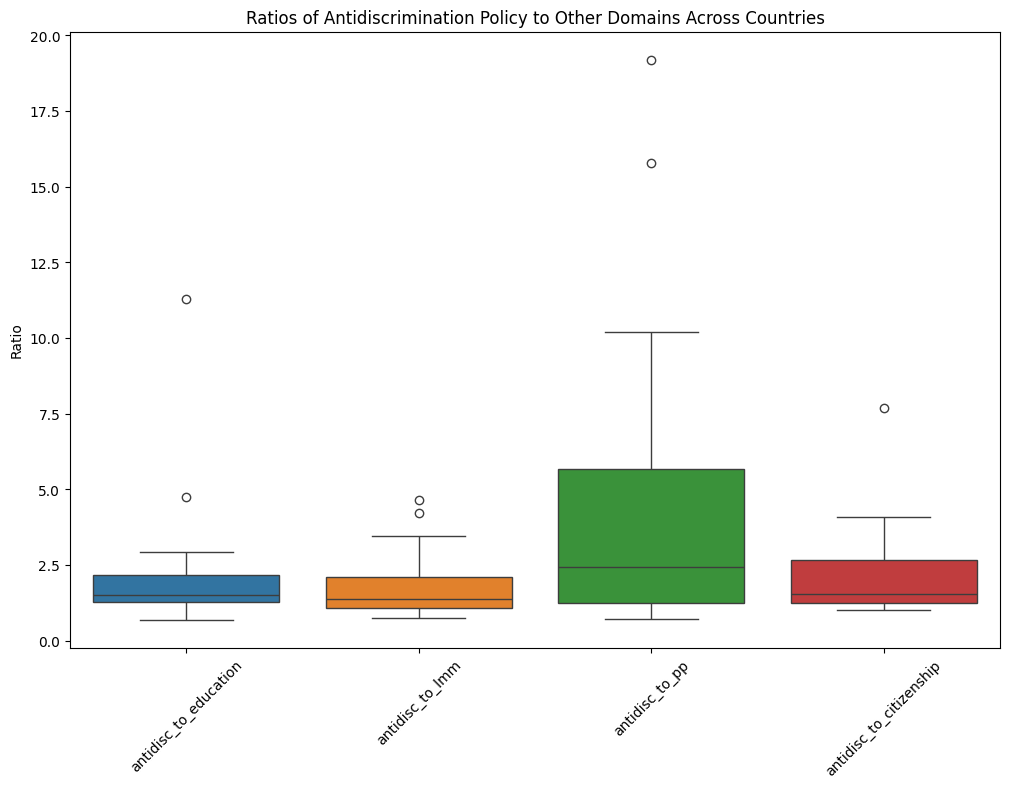

Paired t-test (Antidiscrimination vs. Education): TtestResult(statistic=6.392411311269584, pvalue=9.016813748321408e-07, df=26)
Paired t-test (Antidiscrimination vs. Labor Mobility): TtestResult(statistic=4.805327444991322, pvalue=5.618130576011526e-05, df=26)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the aggregated MIPEX dataset
mipex_data = pd.read_excel('/content/drive/My Drive/PB310/Aggregated-MIPEX.xlsx')

# Calculate ratios of antidiscrimination to other domains
mipex_data['antidisc_to_education'] = mipex_data['antidisc_avg'] / mipex_data['education_avg']
mipex_data['antidisc_to_lmm'] = mipex_data['antidisc_avg'] / mipex_data['lmm_avg']
mipex_data['antidisc_to_pp'] = mipex_data['antidisc_avg'] / mipex_data['pp_avg']
mipex_data['antidisc_to_citizenship'] = mipex_data['antidisc_avg'] / mipex_data['citizenship']

# Visualize the ratios
plt.figure(figsize=(12, 8))
sns.boxplot(data=mipex_data[['antidisc_to_education', 'antidisc_to_lmm',
                             'antidisc_to_pp', 'antidisc_to_citizenship']])
plt.title("Ratios of Antidiscrimination Policy to Other Domains Across Countries")
plt.ylabel("Ratio")
plt.xticks(rotation=45)
plt.show()

# Statistical tests (paired t-test example)
from scipy.stats import ttest_rel

education_test = ttest_rel(mipex_data['antidisc_avg'], mipex_data['education_avg'])
print(f"Paired t-test (Antidiscrimination vs. Education): {education_test}")

lmm_test = ttest_rel(mipex_data['antidisc_avg'], mipex_data['lmm_avg'])
print(f"Paired t-test (Antidiscrimination vs. Labor Mobility): {lmm_test}")


## Section 4: Confirmatory Tests (Study 1 and Study 2)

###*Analysis 1: Testing the relationship between migration flows and European Sentiments*

#### A-Priori Power Analysis for Country-Level Regressions

In [ ]:
from scipy.stats import norm

# Parameters
alpha = 0.01  # Significance level
power = 0.80  # Desired power
f2 = 0.35  # Large effect size (Cohen's f^2)
k = 8  # Number of predictors (IVs)

# Calculate z-critical (z-value for alpha)
z_critical = norm.ppf(1 - alpha / 2)

# Calculate z-power (z-value for desired power)
z_power = norm.ppf(power)

# Compute required sample size using Cohen's formula
required_n = ((z_critical + z_power) ** 2 / f2) + k + 1

print(f"Required Sample Size: {int(round(required_n))}")

#As each country in our country-level sample has more than a 1,000 respondents, this requirement is satisfied.

Required Sample Size: 42


#### A1. Subsection 1. Normalisation and Variance Inflation Factors Check

In [ ]:
# Loading the final combined dataset
final_dataset_path = '/content/drive/My Drive/PB310/Final_Combined_Dataset.xlsx'
final_combined_dataset = pd.read_excel(final_dataset_path)

# Specifying our migration and GDP column for normalisation
columns_to_normalize = ['avg_immigration_2017_2019', 'avg_yearly_change_2011_2019', 'mean_GDP']

# target range
new_min, new_max = 1, 100

# Min-Max Normalisation
for col in columns_to_normalize:
    min_val = final_combined_dataset[col].min()
    max_val = final_combined_dataset[col].max()
    final_combined_dataset[f'{col}_normalized'] = (
        (final_combined_dataset[col] - min_val) / (max_val - min_val) * (new_max - new_min) + new_min
    )

final_combined_dataset.to_excel(final_dataset_path, index=False, engine='openpyxl')

# Viewing the updated dataset to confirm if it was processed normally
print("Updated Final Combined Dataset with Normalized Columns:")
print(final_combined_dataset[[f'{col}_normalized' for col in columns_to_normalize]].head())

print(f"The dataset has been updated with normalized columns and saved to: {final_dataset_path}")


Updated Final Combined Dataset with Normalized Columns:
   avg_immigration_2017_2019_normalized  \
0                             13.202600   
1                              3.864378   
2                              3.313441   
3                              9.085426   
4                              7.925206   

   avg_yearly_change_2011_2019_normalized  mean_GDP_normalized  
0                               19.315380            94.151619  
1                               19.382435             1.000000  
2                               19.831955            20.250225  
3                               31.190185            53.326185  
4                               15.103521            96.216669  
The dataset has been updated with normalized columns and saved to: /content/drive/My Drive/PB310/Final_Combined_Dataset.xlsx


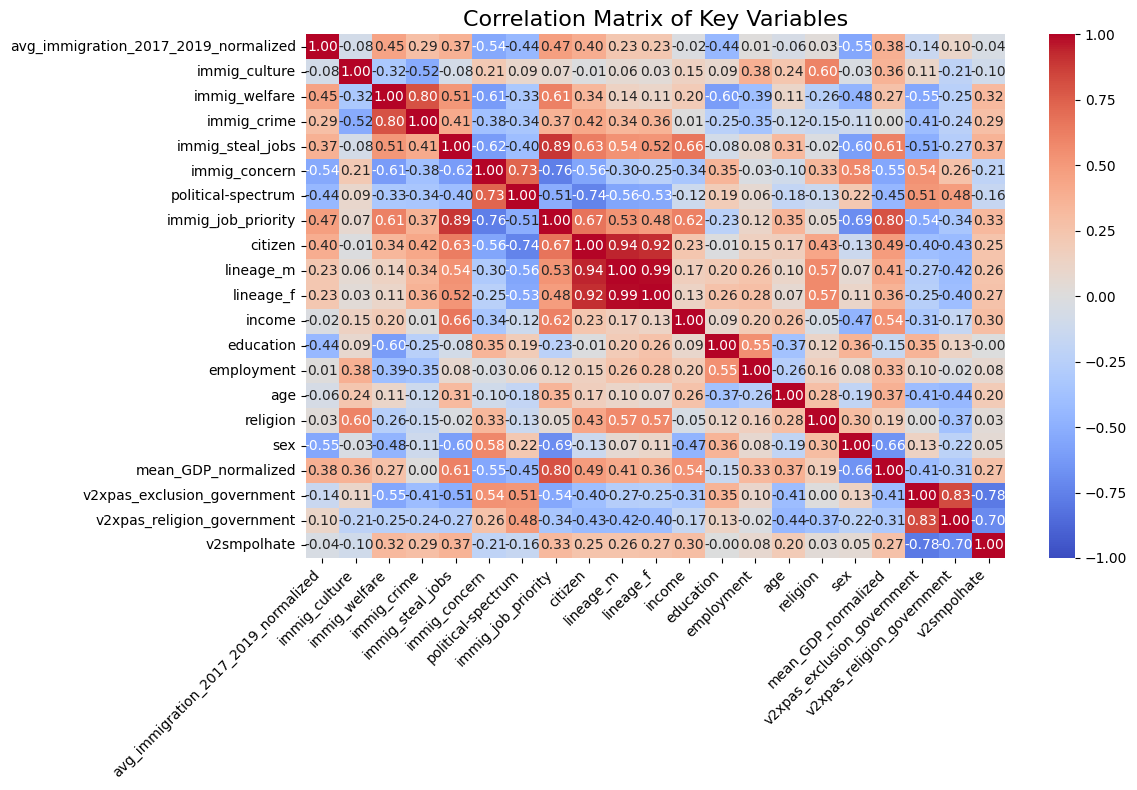

In [ ]:
# List all variables  for the correlation matrix
variables_to_include = [
    'avg_immigration_2017_2019_normalized',
    'immig_culture', 'immig_welfare', 'immig_crime',
    'immig_steal_jobs', 'immig_concern', 'political-spectrum', 'immig_job_priority', 'citizen', 'lineage_m', 'lineage_f', 'income', 'education',
    'employment', 'age', 'religion', 'sex', 'mean_GDP_normalized', 'v2xpas_exclusion_government', 'v2xpas_religion_government', 'v2smpolhate'
]

# Computing correlation matrix for these variables
correlation_matrix = final_combined_dataset[variables_to_include].corr()

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Matrix of Key Variables", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
## Since there's some highly correlated variables, testing Variance Inflation Factor scores for the predictors could prevent us from including highly corrrelated variables together.

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select predictors for VIF calculation
predictor_columns = [
    'avg_immigration_2017_2019_normalized', 'income', 'education',
    'employment', 'age', 'religion', 'sex',  'v2xpas_exclusion_government', 'mean_GDP_normalized'
]

# Add a constant for VIF calculation
X = add_constant(final_combined_dataset[predictor_columns])

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factors:")
print(vif_data)

## Mean_gdp_normalised seems to be slightly above the threshold of 5, but since this only indicates a moderate effect, and studies recommend no significant impact on models with this value, we will proceed to use this variable.

Variance Inflation Factors:
                               Variable           VIF
0                                 const  38657.081482
1  avg_immigration_2017_2019_normalized      3.012430
2                                income      2.175411
3                             education      2.669823
4                            employment      2.896632
5                                   age      2.149499
6                              religion      2.610821
7                                   sex      8.065687
8           v2xpas_exclusion_government      2.345085
9                   mean_GDP_normalized      6.415616


#### A1. Subsection 2. Confirmatory Tests

In [ ]:
## First, we run regressions on EU-level data

import statsmodels.api as sm

#  predictors and control variables
predictors = ['avg_immigration_2017_2019_normalized']
controls = ['income', 'employment', 'education', 'age', 'religion', 'sex', 'mean_GDP_normalized']
iv_list = predictors + controls

# Step 2: Define dependent variables (individual EVS indicators)
dependent_variables = [
    'immig_culture', 'immig_welfare', 'immig_crime', 'immig_steal_jobs', 'immig_concern', 'political-spectrum', 'immig_development', 'party_support', 'v2xpas_exclusion_government', 'v2smpolhate'
]

# Step 3: Run regression models for each dependent variable
for dv in dependent_variables:
    X = final_combined_dataset[iv_list]
    X = sm.add_constant(X)  # Add intercept
    y = final_combined_dataset[dv]

    model = sm.OLS(y, X).fit()

    print(f"\nRegression Results for Dependent Variable: {dv}")
    print(model.summary())


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Step 1: Preparing predictors and controls
predictors = ['avg_immigration_2017_2019_normalized']
controls = ['income', 'employment', 'education', 'age', 'religion', 'sex', 'mean_GDP_normalized']
iv_list = predictors + controls

# Step 2: Define dependent variables
dependent_variables = [
    'immig_culture', 'immig_welfare', 'immig_crime', 'immig_steal_jobs',
    'immig_concern', 'political-spectrum', 'immig_development',
    'party_support', 'v2xpas_exclusion_government', 'v2smpolhate', 'immig_job_priority'
]

# Step 3: Prepare a DataFrame for regression results
regression_results = []

# Step 4: Run regression models for each dependent variable and create scatter plots with regression lines
for dv in dependent_variables:
    X = final_combined_dataset[iv_list]
    X = sm.add_constant(X)  # Add intercept
    y = final_combined_dataset[dv]

    # Fit OLS model
    model = sm.OLS(y, X).fit()

    # Collect R-squared and p-values for the model
    regression_results.append({
        "Dependent Variable": dv,
        "R-squared": model.rsquared,
        "P-value (F-statistic)": model.f_pvalue
    })

    # Plotting: scatter plot with regression line for the primary predictor
    plt.figure(figsize=(8, 5))
    sns.regplot(
        x=final_combined_dataset['avg_immigration_2017_2019_normalized'],
        y=final_combined_dataset[dv],
        line_kws={"color": "red", "alpha": 0.7, "lw": 2},
        scatter_kws={"alpha": 0.6}
    )
    plt.title(f"Regression Plot: {dv} vs. avg_immigration_2017_2019_normalized")
    plt.xlabel("Normalized Migration Flows (2017-2019)")
    plt.ylabel(dv)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Display regression results summary to the user
regression_results_df = pd.DataFrame(regression_results)
import ace_tools as tools; tools.display_dataframe_to_user(name="Regression Results Summary", dataframe=regression_results_df)


In [ ]:
import statsmodels.api as sm

# Step 1: Define predictors and control variables
predictors = [ 'v2xpas_exclusion_government']
controls = ['income', 'education', 'employment', 'age', 'religion', 'sex', 'mean_GDP_normalized']
iv_list = predictors + controls

# Step 2: Define dependent variables (individual EVS indicators)
dependent_variables = [
    'immig_culture', 'immig_welfare', 'immig_crime', 'immig_steal_jobs', 'immig_concern', 'immig_job_priority', 'immig_development', 'political-spectrum'
]

# Step 3: Run regression models for each dependent variable
for dv in dependent_variables:
    X = final_combined_dataset[iv_list]
    X = sm.add_constant(X)  # Add intercept
    y = final_combined_dataset[dv]

    model = sm.OLS(y, X).fit()

    print(f"\nRegression Results for Dependent Variable: {dv}")
    print(model.summary())


Regression Results for Dependent Variable: immig_culture
                            OLS Regression Results                            
Dep. Variable:          immig_culture   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     1.868
Date:                Mon, 13 Jan 2025   Prob (F-statistic):              0.159
Time:                        23:10:57   Log-Likelihood:                -8.8504
No. Observations:                  21   AIC:                             35.70
Df Residuals:                      12   BIC:                             45.10
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [ ]:
import statsmodels.api as sm

# Step 1: Define predictors and control variables
predictors = ['v2smpolhate' ]
controls = ['income', 'education', 'employment', 'age', 'religion', 'sex']
iv_list = predictors + controls

# Step 2: Define dependent variables (individual EVS indicators)
dependent_variables = [
    'immig_culture', 'immig_welfare', 'immig_crime', 'immig_steal_jobs', 'immig_concern', 'immig_job_priority', 'immig_development', 'political-spectrum'
]

# Step 3: Run regression models for each dependent variable
for dv in dependent_variables:
    X = final_combined_dataset[iv_list]
    X = sm.add_constant(X)  # Add intercept
    y = final_combined_dataset[dv]

    model = sm.OLS(y, X).fit()

    print(f"\nRegression Results for Dependent Variable: {dv}")
    print(model.summary())


Regression Results for Dependent Variable: immig_culture
                            OLS Regression Results                            
Dep. Variable:          immig_culture   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     2.228
Date:                Mon, 13 Jan 2025   Prob (F-statistic):              0.101
Time:                        12:54:48   Log-Likelihood:                -9.0645
No. Observations:                  21   AIC:                             34.13
Df Residuals:                      13   BIC:                             42.49
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

#### A1. Subsection 3: Country Level Regressions - Does Migration increase predict goverment rhetoric, and does government rhetoric predict public sentiments at the country-level?

In [ ]:
import pandas as pd

# Step 1: Load the final combined dataset
final_dataset_path = '/content/drive/My Drive/PB310/Final_Individual_Combined_Dataset_Filtered.xlsx'
final_combined_dataset = pd.read_excel(final_dataset_path)

# Step 2: Select migration columns for normalization
migration_columns = ['avg_immigration_2017_2019', 'avg_yearly_change_2011_2019', 'avg_yearly_perc_change_2011_2019', 'mean_GDP']

# Define the target range (e.g., 1–10) for normalization
new_min, new_max = 1, 100

# Step 3: Apply Min-Max Normalization and save new columns
for col in migration_columns:
    min_val = final_combined_dataset[col].min()
    max_val = final_combined_dataset[col].max()
    final_combined_dataset[f'{col}_normalized'] = (
        (final_combined_dataset[col] - min_val) / (max_val - min_val) * (new_max - new_min) + new_min
    )

# Step 4: Save the updated dataset back to the same file
output_path = '/content/drive/My Drive/PB310/Final_Individual_Combined_Dataset_Filtered.xlsx'
final_combined_dataset.to_excel(output_path, index=False, engine='openpyxl')

print("Updated dataset with normalized migration variables saved to:")
print(output_path)


Updated dataset with normalized migration variables saved to:
/content/drive/My Drive/PB310/Final_Individual_Combined_Dataset_Filtered.xlsx


In [ ]:
# Step 1: Load the dataset
final_dataset_path = '/content/drive/My Drive/PB310/Final_Individual_Combined_Dataset_Filtered.xlsx'
final_combined_dataset = pd.read_excel(final_dataset_path)

# Step 2: Define predictors and control variables
predictors = ['avg_immigration_2017_2019_normalized']
controls = ['income', 'education', 'employment', 'age', 'religion', 'sex', 'mean_GDP_normalized']
iv_list = predictors + controls

# Step 3: Define dependent variables (individual EVS indicators)
dependent_variables = [
   'immig_culture', 'immig_welfare', 'immig_crime', 'immig_steal_jobs',
    'immig_concern', 'political-spectrum', 'immig_development',
    'party_support', 'v2xpas_exclusion_government', 'v2smpolhate', 'immig_job_priority'
]

# Step 4: Perform country-specific regressions
countries = final_combined_dataset['country_code'].unique()
country_results = {}

for country in countries:
    print(f"\nPerforming regressions for country: {country}")

    # Filter dataset for the specific country
    country_data = final_combined_dataset[final_combined_dataset['country_code'] == country]

    # Prepare results storage for this country
    country_results[country] = {}

    # Perform regression for each dependent variable
    for dv in dependent_variables:
        X = country_data[iv_list]
        X = sm.add_constant(X)  # Add intercept
        y = country_data[dv]

        # Run OLS regression
        model = sm.OLS(y, X).fit()
        country_results[country][dv] = model

        # Print the summary for each dependent variable
        print(f"\nRegression Results for {country}, Dependent Variable: {dv}")
        print(model.summary())

# Step 5: Save results or extract specific statistics
coefficients = []
for country, models in country_results.items():
    for dv, model in models.items():
        coefficients.append({
            'country': country,
            'dependent_variable': dv,
            'coefficient_avg_immigration': model.params['avg_immigration_2017_2019_normalized'],
            'p_value_avg_immigration': model.pvalues['avg_immigration_2017_2019_normalized']
        })

# Convert results into a DataFrame
coefficients_df = pd.DataFrame(coefficients)

# Step 6: Save the coefficients to an Excel file
output_path = '/content/drive/My Drive/PB310/Country_Level_Regression_Coefficients-A1-1.xlsx'
coefficients_df.to_excel(output_path, index=False, engine='openpyxl')
print(f"\nRegression coefficients saved to: {output_path}")



Performing regressions for country: AT

Regression Results for AT, Dependent Variable: immig_culture
                            OLS Regression Results                            
Dep. Variable:          immig_culture   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     10.22
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           3.96e-11
Time:                        23:18:41   Log-Likelihood:                -3861.9
No. Observations:                1644   AIC:                             7738.
Df Residuals:                    1637   BIC:                             7776.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



Regression Results for DK, Dependent Variable: immig_concern
                            OLS Regression Results                            
Dep. Variable:          immig_concern   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     17.10
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           1.47e-19
Time:                        23:18:43   Log-Likelihood:                -5074.7
No. Observations:                3362   AIC:                         1.016e+04
Df Residuals:                    3355   BIC:                         1.021e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



Regression Results for EE, Dependent Variable: immig_culture
                            OLS Regression Results                            
Dep. Variable:          immig_culture   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.537
Date:                Mon, 13 Jan 2025   Prob (F-statistic):            0.00177
Time:                        23:18:43   Log-Likelihood:                -3073.0
No. Observations:                1304   AIC:                             6160.
Df Residuals:                    1297   BIC:                             6196.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                            OLS Regression Results                            
Dep. Variable:            immig_crime   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     4.061
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           0.000488
Time:                        23:18:43   Log-Likelihood:                -2778.3
No. Observations:                1199   AIC:                             5571.
Df Residuals:                    1192   BIC:                             5606.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                            OLS Regression Results                            
Dep. Variable:       immig_steal_jobs   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.966
Date:                Mon, 13 Jan 2025   Prob (F-statistic):            0.00698
Time:                        23:18:45   Log-Likelihood:                -3871.6
No. Observations:                1514   AIC:                             7757.
Df Residuals:                    1507   BIC:                             7794.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                            OLS Regression Results                            
Dep. Variable:          immig_culture   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.502
Date:                Mon, 13 Jan 2025   Prob (F-statistic):             0.0204
Time:                        23:18:46   Log-Likelihood:                -5285.4
No. Observations:                2404   AIC:                         1.058e+04
Df Residuals:                    2397   BIC:                         1.063e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



Regression Results for RO, Dependent Variable: immig_crime
                            OLS Regression Results                            
Dep. Variable:            immig_crime   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     6.372
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           2.07e-07
Time:                        23:18:47   Log-Likelihood:                -4134.9
No. Observations:                1613   AIC:                             8286.
Df Residuals:                    1605   BIC:                             8329.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                                 OLS Regression Results                                
Dep. Variable:     v2xpas_exclusion_government   R-squared:                        -inf
Model:                                     OLS   Adj. R-squared:                   -inf
Method:                          Least Squares   F-statistic:                    -229.3
Date:                         Mon, 13 Jan 2025   Prob (F-statistic):               1.00
Time:                                 23:18:47   Log-Likelihood:                 9213.0
No. Observations:                         1613   AIC:                        -1.841e+04
Df Residuals:                             1605   BIC:                        -1.837e+04
Df Model:                                    7                                         
Covariance Type:                     nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                            OLS Regression Results                            
Dep. Variable:          immig_culture   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     4.654
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           3.71e-05
Time:                        23:18:48   Log-Likelihood:                -2880.4
No. Observations:                1209   AIC:                             5777.
Df Residuals:                    1201   BIC:                             5818.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss



Regression Results for ES, Dependent Variable: v2smpolhate
                                   OLS Regression Results                                  
Dep. Variable:            v2smpolhate   R-squared:          -60270636177334636698927104.000
Model:                            OLS   Adj. R-squared:     -60621922150058479459500032.000
Method:                 Least Squares   F-statistic:                                 -171.6
Date:                Mon, 13 Jan 2025   Prob (F-statistic):                            1.00
Time:                        23:18:48   Log-Likelihood:                              7653.7
No. Observations:                1209   AIC:                                     -1.529e+04
Df Residuals:                    1201   BIC:                                     -1.525e+04
Df Model:                           7                                                      
Covariance Type:            nonrobust                                                      
                    

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                            OLS Regression Results                            
Dep. Variable:            v2smpolhate   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -197.8
Date:                Mon, 13 Jan 2025   Prob (F-statistic):               1.00
Time:                        23:18:49   Log-Likelihood:                 35809.
No. Observations:                1194   AIC:                        -7.160e+04
Df Residuals:                    1187   BIC:                        -7.157e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [ ]:
# Filter for statistically significant coefficients (p < 0.05)
significant_coefficients = coefficients_df[coefficients_df['p_value_avg_immigration'] < 0.05]

print("Significant Coefficients for avg_immigration_2017_2019_normalized:")
print(significant_coefficients)

# Save significant coefficients to a separate file for reference
output_path_significant = '/content/drive/My Drive/PB310/Significant_Coefficients.xlsx'
significant_coefficients.to_excel(output_path_significant, index=False, engine='openpyxl')
print(f"Significant coefficients saved to: {output_path_significant}")


Significant Coefficients for avg_immigration_2017_2019_normalized:
    country           dependent_variable  coefficient_avg_immigration  \
11       BG                immig_culture                     1.433256   
12       BG                immig_welfare                     0.908247   
13       BG                  immig_crime                     0.959529   
14       BG             immig_steal_jobs                     1.279717   
15       BG                immig_concern                     1.143973   
..      ...                          ...                          ...   
207      SI                  v2smpolhate                    -0.001059   
224      SE                immig_concern                    -0.043672   
225      SE           political-spectrum                    -0.106405   
228      SE  v2xpas_exclusion_government                     0.000426   
229      SE                  v2smpolhate                     0.004060   

     p_value_avg_immigration  
11              3.751295e

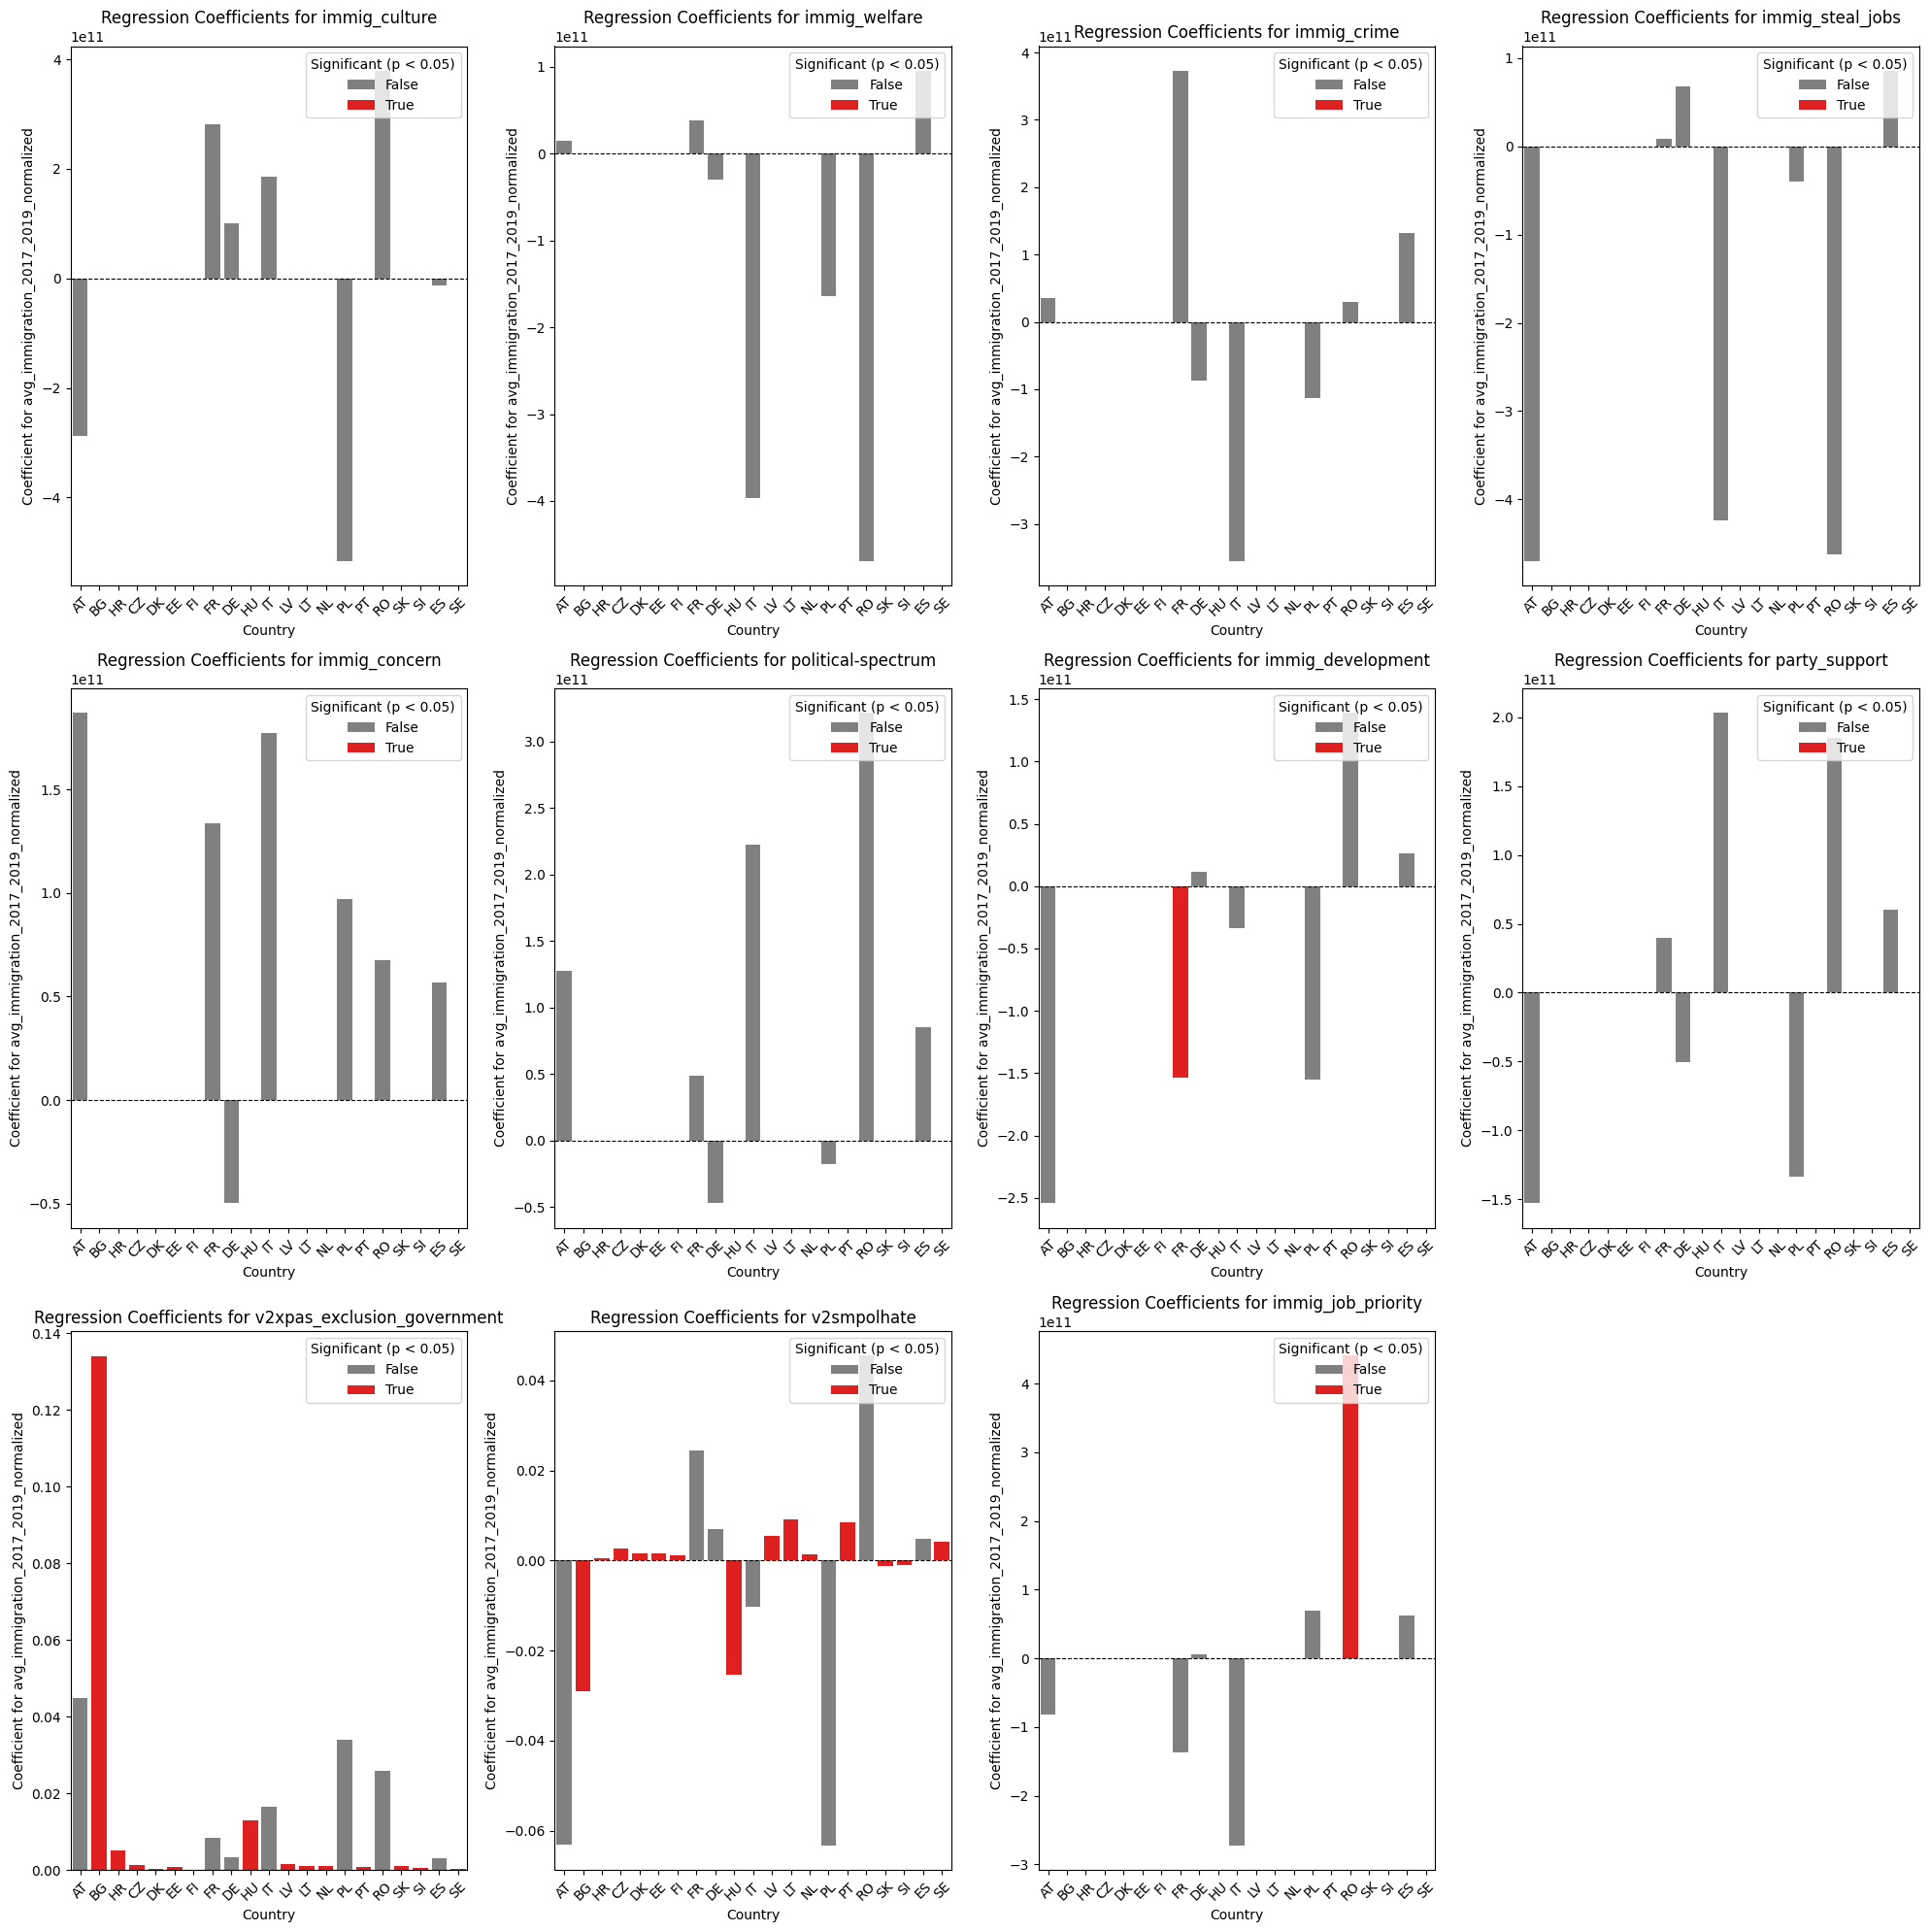

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Determine the number of rows and columns for the grid
num_plots = len(dependent_variables)
cols = 4  # Number of columns
rows = math.ceil(num_plots / cols)  # Number of rows needed

# Create a figure and axes for the grid
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Iterate over dependent variables and plot each
for i, dv in enumerate(dependent_variables):
    # Filter data for the specific dependent variable
    dv_data = coefficients_df[coefficients_df['dependent_variable'] == dv]

    # Plot on the corresponding subplot
    sns.barplot(
        data=dv_data,
        x='country',
        y='coefficient_avg_immigration',
        hue=(dv_data['p_value_avg_immigration'] < 0.05),  # Highlight significant coefficients
        dodge=False,
        palette={True: 'red', False: 'grey'},
        ax=axes[i]
    )
    axes[i].axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at 0
    axes[i].set_title(f"Regression Coefficients for {dv}")
    axes[i].set_ylabel("Coefficient for avg_immigration_2017_2019_normalized")
    axes[i].set_xlabel("Country")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Significant (p < 0.05)', loc='upper right')

# Hide unused subplots if the number of plots is less than the grid size
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Step 1: Load the dataset
final_dataset_path = '/content/drive/My Drive/PB310/Final_Individual_Combined_Dataset_Filtered.xlsx'
final_combined_dataset = pd.read_excel(final_dataset_path)

# Step 2: Define predictors and control variables
predictors = ['v2xpas_exclusion_government']
controls = ['income', 'education', 'employment', 'age', 'religion', 'sex', 'mean_GDP_normalized']
iv_list = predictors + controls

# Step 3: Define dependent variables (individual EVS indicators)
dependent_variables = [
   'immig_culture', 'immig_welfare', 'immig_crime', 'immig_steal_jobs',
    'immig_concern', 'political-spectrum', 'immig_development',
    'party_support', 'immig_job_priority'
]

# Step 4: Perform country-specific regressions
countries = final_combined_dataset['country_code'].unique()
country_results = []

for country in countries:
    print(f"\nPerforming regressions for country: {country}")

    # Filter dataset for the specific country
    country_data = final_combined_dataset[final_combined_dataset['country_code'] == country]

    # Perform regression for each dependent variable
    for dv in dependent_variables:
        try:
            # Define predictors (X) and dependent variable (y)
            X = country_data[iv_list]
            X = sm.add_constant(X, has_constant='add')  # Add intercept
            y = country_data[dv]

            # Drop rows with missing data
            data = pd.concat([X, y], axis=1).dropna()

            if data.shape[0] < 5:  # Skip if fewer than 5 observations
                print(f"Skipping {dv} for {country} due to insufficient data.")
                continue

            X_clean = data[X.columns]
            y_clean = data[dv]

            # Run OLS regression
            model = sm.OLS(y_clean, X_clean).fit()

            # Store results
            country_results.append({
                'country': country,
                'dependent_variable': dv,
                'coefficient_v2xpas_exclusion_government': model.params['v2xpas_exclusion_government'],
                'p_value_v2xpas_exclusion_government': model.pvalues['v2xpas_exclusion_government'],
                'r_squared': model.rsquared,
                'adj_r_squared': model.rsquared_adj,
                'f_statistic': model.fvalue,
                'p_f_statistic': model.f_pvalue
            })

            # Print the summary
            print(f"\nRegression Results for {country}, Dependent Variable: {dv}")
            print(model.summary())

        except Exception as e:
            print(f"Error processing {dv} for {country}: {e}")

# Step 5: Convert results into a DataFrame
results_df = pd.DataFrame(country_results)

# Step 6: Save the coefficients to an Excel file
output_path = '/content/drive/My Drive/PB310/Country_Level_Regression_Coefficients-A2-Fixed.xlsx'
results_df.to_excel(output_path, index=False, engine='openpyxl')
print(f"\nRegression coefficients saved to: {output_path}")


Streaming output truncated to the last 5000 lines.

Regression Results for EE, Dependent Variable: immig_development
                            OLS Regression Results                            
Dep. Variable:      immig_development   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     11.44
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           1.68e-12
Time:                        16:38:59   Log-Likelihood:                -1501.3
No. Observations:                1304   AIC:                             3017.
Df Residuals:                    1297   BIC:                             3053.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.97

#### Achieved Power Analysis

In [ ]:
from scipy.stats import f

# Add manual power calculation to the results
post_hoc_results = []

for index, row in results_df.iterrows():
    try:
        # Extract values from the regression results
        r_squared = row['r_squared']
        n = final_combined_dataset[final_combined_dataset['country_code'] == row['country']].shape[0]  # Sample size for the country
        k = len(iv_list)  # Number of predictors (including controls)

        # Calculate effect size (f^2)
        f2 = r_squared / (1 - r_squared) if 0 <= r_squared < 1 else None

        # Calculate degrees of freedom
        df_num = k
        df_den = n - k - 1

        # Skip invalid calculations
        if f2 is None or df_den <= 0:
            print(f"Skipping power calculation for {row['dependent_variable']} in {row['country']} due to invalid parameters.")
            post_hoc_results.append({
                'country': row['country'],
                'dependent_variable': row['dependent_variable'],
                'r_squared': r_squared,
                'effect_size_f2': f2,
                'achieved_power': None
            })
            continue

        # Calculate critical F-value
        alpha = 0.05
        critical_f = f.ppf(1 - alpha, df_num, df_den)

        # Calculate observed F-value
        observed_f = (f2 * df_den) / df_num

        # Calculate power (1 - probability of Type II error)
        achieved_power = 1 - f.cdf(critical_f, df_num, df_den, observed_f)

        # Append results
        post_hoc_results.append({
            'country': row['country'],
            'dependent_variable': row['dependent_variable'],
            'r_squared': r_squared,
            'effect_size_f2': f2,
            'achieved_power': achieved_power
        })

    except Exception as e:
        print(f"Error calculating power for {row['dependent_variable']} in {row['country']}: {e}")
        post_hoc_results.append({
            'country': row['country'],
            'dependent_variable': row['dependent_variable'],
            'r_squared': r_squared,
            'effect_size_f2': f2,
            'achieved_power': None
        })

# Convert power results to a DataFrame
power_results_df = pd.DataFrame(post_hoc_results)

# Merge power results back into the main results DataFrame
results_df = results_df.merge(power_results_df, on=['country', 'dependent_variable'], how='left')

# Save updated results with power to an Excel file
power_output_path = '/content/drive/My Drive/PB310/Country_Level_Regression_with_Manual_Power.xlsx'
results_df.to_excel(power_output_path, index=False, engine='openpyxl')

print(f"\nRegression results with manual power analysis saved to: {power_output_path}")



Regression results with manual power analysis saved to: /content/drive/My Drive/PB310/Country_Level_Regression_with_Manual_Power.xlsx


In [ ]:
# Summary statistics for power values
power_summary = results_df['achieved_power'].describe()

# Count of models with sufficient power
sufficient_power_count = (results_df['achieved_power'] >= 0.80).sum()
total_models = results_df['achieved_power'].notnull().sum()

# Calculate percentage of models with sufficient power
sufficient_power_percentage = (sufficient_power_count / total_models) * 100 if total_models > 0 else 0

# Print the summary
print("\nSummary of Achieved Power for All Models:")
print(power_summary)
print(f"Number of models with sufficient power (≥ 0.80): {sufficient_power_count}/{total_models} ({sufficient_power_percentage:.2f}%)")

# Save summary to a text file for documentation
summary_output_path = '/content/drive/My Drive/PB310/Power_Summary.txt'
with open(summary_output_path, 'w') as f:
    f.write("Summary of Achieved Power for All Models:\n")
    f.write(power_summary.to_string() + "\n")
    f.write(f"\nNumber of models with sufficient power (≥ 0.80): {sufficient_power_count}/{total_models} ({sufficient_power_percentage:.2f}%)\n")

print(f"\nPower summary saved to: {summary_output_path}")

# Filter rows with low power
low_power_rows = results_df[results_df['achieved_power'] < 0.80]

# Show rows with low power
print("\nModels with Low Power (Achieved Power < 0.80):")
print(low_power_rows)

# Save the low power rows to an Excel file for further investigation
low_power_output_path = '/content/drive/My Drive/PB310/Low_Power_Models.xlsx'
low_power_rows.to_excel(low_power_output_path, index=False, engine='openpyxl')
print(f"\nLow power models saved to: {low_power_output_path}")




Summary of Achieved Power for All Models:
count    189.000000
mean       0.962415
std        0.146618
min        0.137552
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: achieved_power, dtype: float64
Number of models with sufficient power (≥ 0.80): 177/189 (93.65%)

Power summary saved to: /content/drive/My Drive/PB310/Power_Summary.txt

Models with Low Power (Achieved Power < 0.80):
    country  dependent_variable  coefficient_v2xpas_exclusion_government  \
17       BG  immig_job_priority                                 0.465768   
24       HR   immig_development                                -0.004366   
81       HU       immig_culture                                 0.009151   
85       HU       immig_concern                                 0.006342   
87       HU   immig_development                                 0.003698   
111      LT    immig_steal_jobs                                 0.001881   
144      RO       immig_culture          

<ipython-input-46-9ba0499d498c>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(country_data['dependent_variable'], rotation=45, ha='right', fontsize=8)
<ipython-input-46-9ba0499d498c>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(country_data['dependent_variable'], rotation=45, ha='right', fontsize=8)
<ipython-input-46-9ba0499d498c>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(country_data['dependent_variable'], rotation=45, ha='right', fontsize=8)
<ipython-input-46-9ba0499d498c>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(country_data['dependent_variable'], rotat

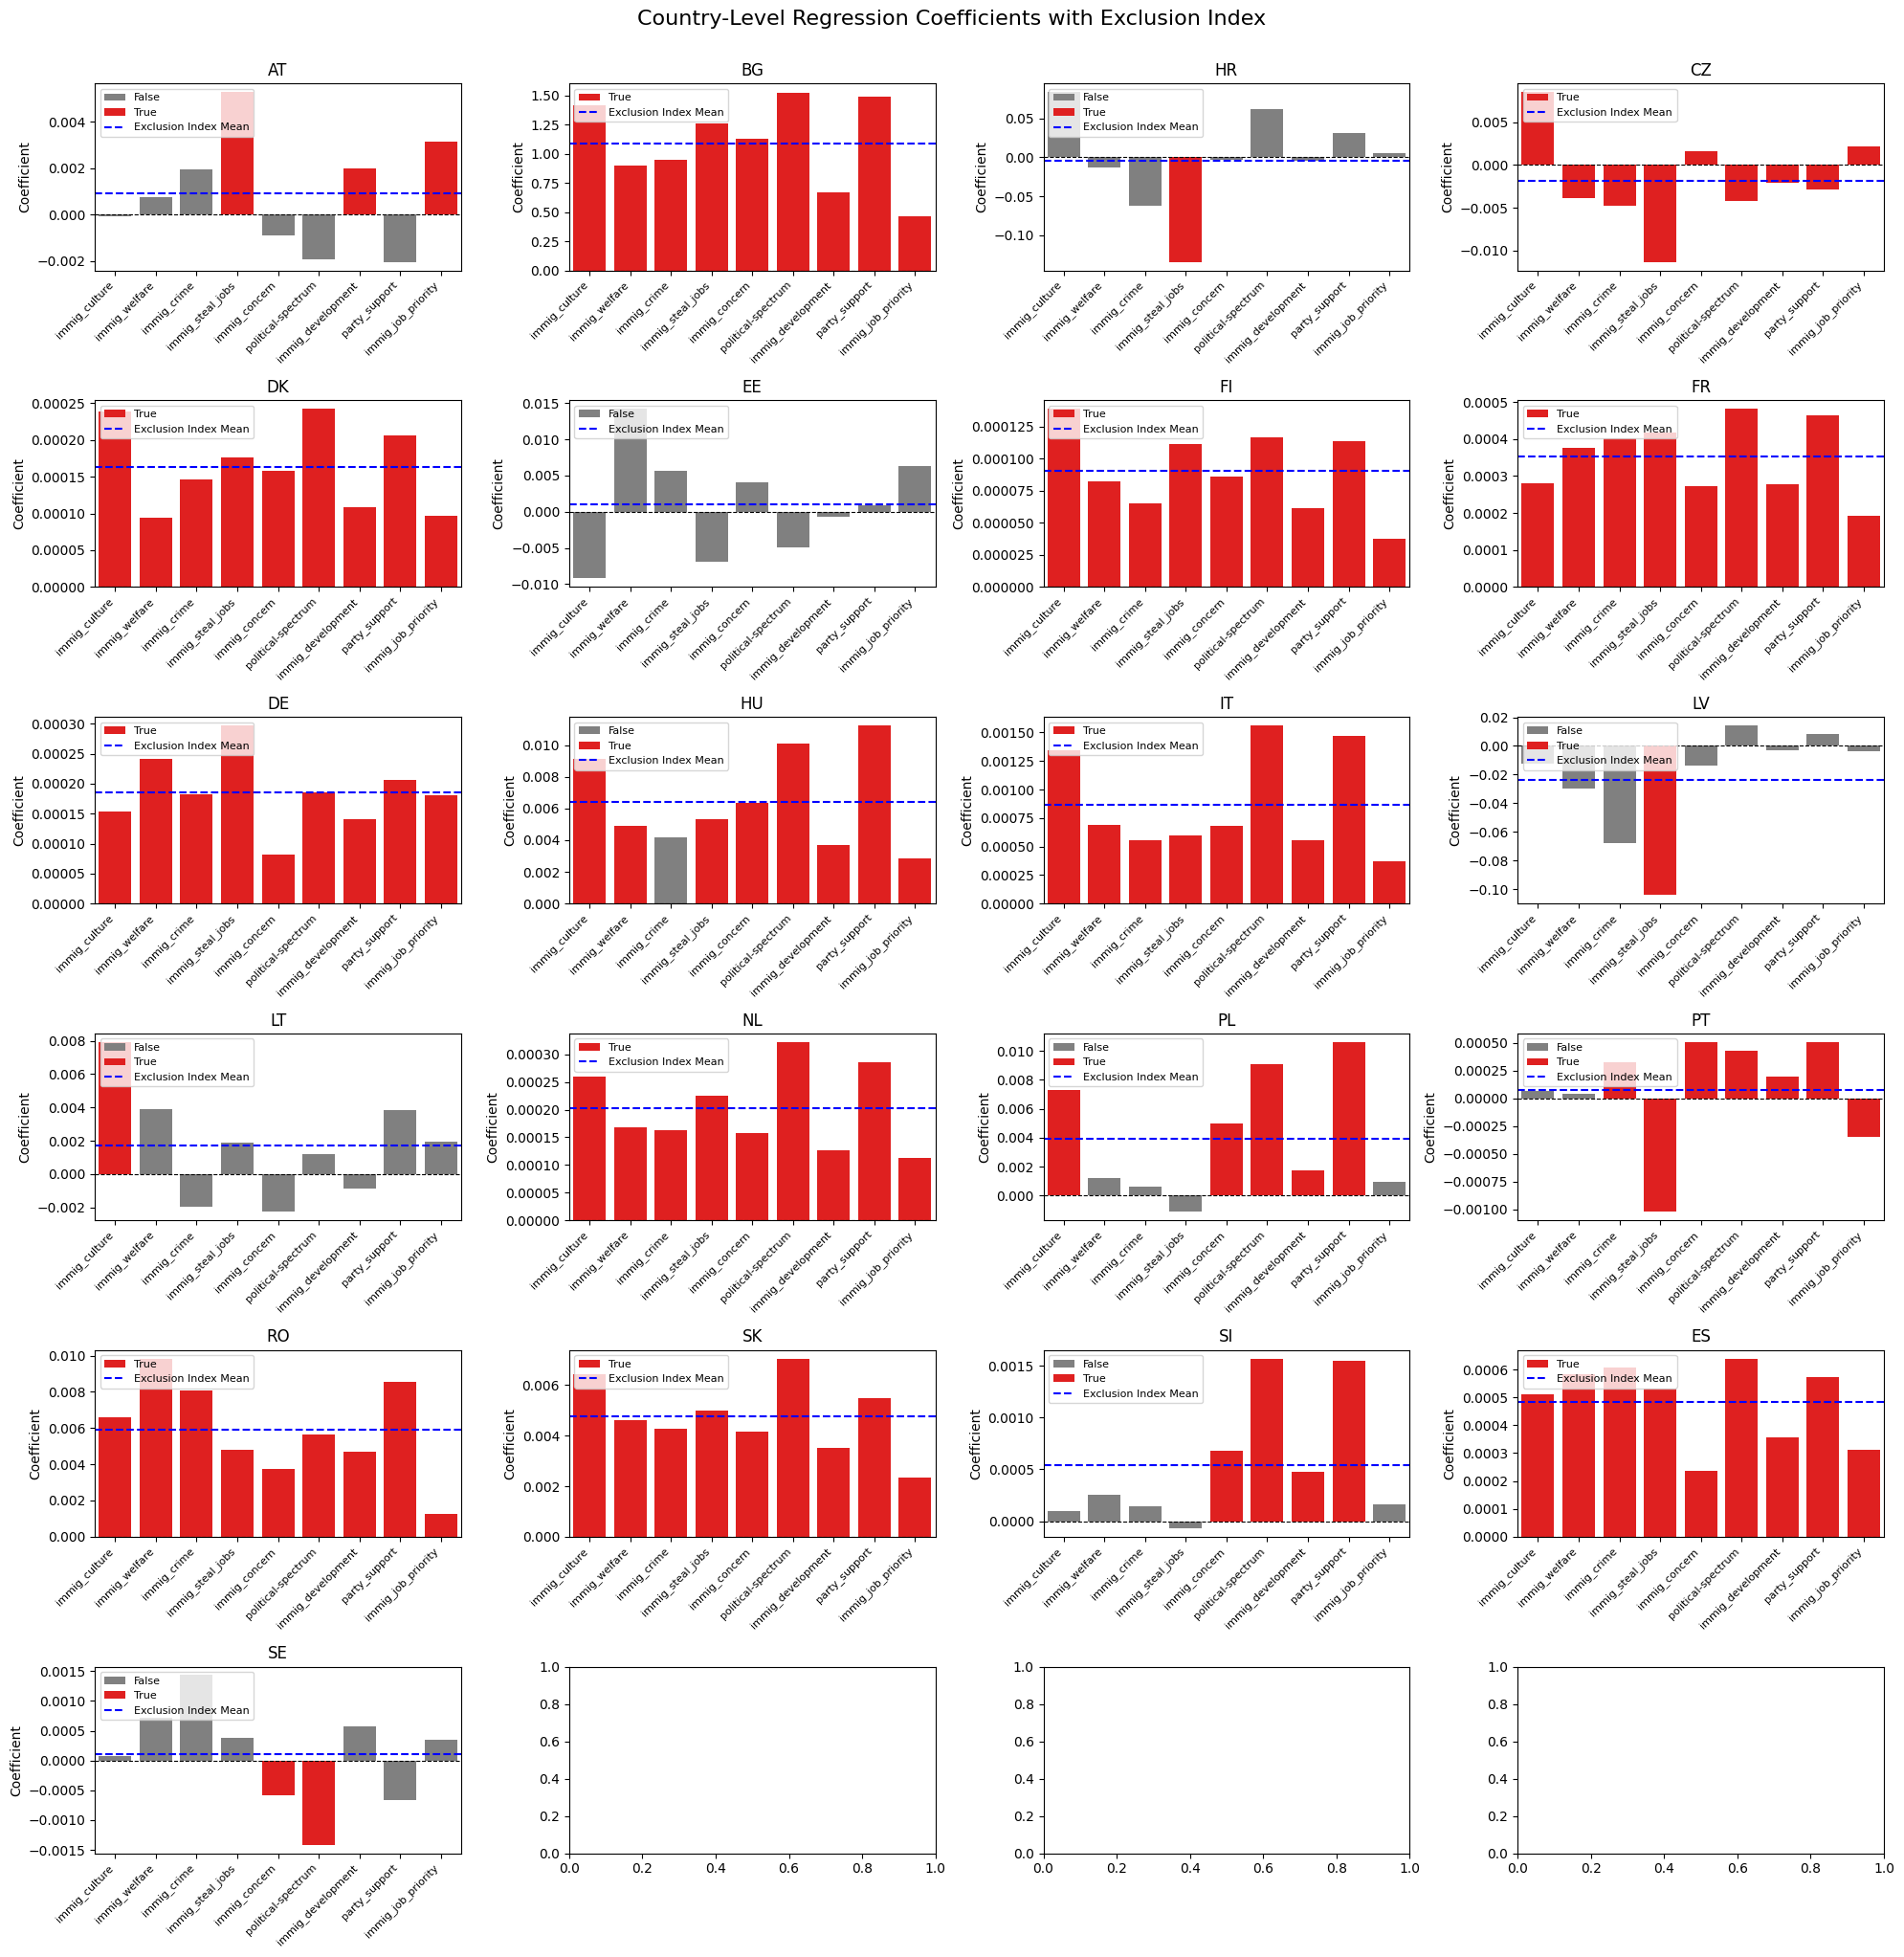

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define countries and dependent variables
countries = results_df['country'].unique()
dependent_variables = results_df['dependent_variable'].unique()

# Set up the 3x7 grid for subplots
fig, axes = plt.subplots(6, 4, figsize=(20, 20))
axes = axes.flatten()

# Plot for each country
for i, country in enumerate(countries):
    ax = axes[i]
    country_data = results_df[results_df['country'] == country]

    # Bar plot for regression coefficients
    sns.barplot(
        data=country_data,
        x='dependent_variable',
        y='coefficient_v2xpas_exclusion_government',
        hue=(country_data['p_value_v2xpas_exclusion_government'] < 0.05),  # Highlight significant
        dodge=False,
        palette={True: 'red', False: 'grey'},
        ax=ax
    )

    # Add the exclusion index as a horizontal bar plot
    exclusion_value = country_data['coefficient_v2xpas_exclusion_government'].mean()
    ax.axhline(exclusion_value, color='blue', linestyle='--', label='Exclusion Index Mean')


    ax.set_title(f"{country}")
    ax.set_xticklabels(country_data['dependent_variable'], rotation=45, ha='right', fontsize=8)
    ax.set_xlabel("")
    ax.set_ylabel("Coefficient")
    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax.legend(loc='upper left', fontsize=8)

# Adjust layout and display
plt.tight_layout()
plt.suptitle("Country-Level Regression Coefficients with Exclusion Index", y=1.02, fontsize=16)
plt.show()


### *Analysis 2: Testing the moderating effect of migration policy effectiveness on rhetoric and anti-immigrant sentiment.*

#### A2. Subsection 1: Merging MIPEX with the Final Dataset

In [ ]:
import pandas as pd

# Load the un-aggregated Final Combined Dataset
final_combined_dataset_path = '/content/drive/My Drive/PB310/Final_Combined_Dataset.xlsx'
final_combined_dataset = pd.read_excel(final_combined_dataset_path)

#  Load the aggregated MIPEX dataset
mipex_path = '/content/drive/My Drive/PB310/Aggregated-MIPEX.xlsx'
aggregated_mipex = pd.read_excel(mipex_path)

# Step 3: Standardize country codes (if needed)
final_combined_dataset['country_code'] = final_combined_dataset['country_code'].str.strip().str.upper()
aggregated_mipex['country_code'] = aggregated_mipex['country_code'].str.strip().str.upper()

# Step 4: Merge the MIPEX data with the Final Combined Dataset
merged_dataset = pd.merge(
    final_combined_dataset,
    aggregated_mipex,
    on='country_code',  # Merge on the country_code column
    how='left'          # Keep all rows from the Final Combined Dataset
)

# Step 5: Save the merged dataset
output_path = '/content/drive/My Drive/PB310/Final_Combined_Dataset_with_MIPEX_Aggregated.xlsx'
merged_dataset.to_excel(output_path, index=False, engine='openpyxl')

print(f"Merged un-aggregated dataset with MIPEX data saved to: {output_path}")


Merged un-aggregated dataset with MIPEX data saved to: /content/drive/My Drive/PB310/Final_Combined_Dataset_with_MIPEX_Aggregated.xlsx


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

# Prepare the data for VIF calculation
# Selecting the relevant columns (predictor, moderator, and interaction term)
vif_columns = [
    'avg_immigration_2017_2019_normalized',
    'overall_score',
    'interaction'
]

# Ensure that the interaction term is already computed
if 'interaction' not in final_combined_dataset.columns:
    final_combined_dataset['interaction'] = (
        final_combined_dataset['avg_immigration_2017_2019_normalized'] *
        final_combined_dataset['overall_score']
    )

# Add constant for VIF calculation
vif_data = add_constant(final_combined_dataset[vif_columns])

# Calculate VIF for each variable
vif_results = pd.DataFrame({
    "Variable": vif_data.columns,
    "VIF": [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
})

# Display the VIF results
import ace_tools as tools; tools.display_dataframe_to_user(name="Variance Inflation Factors for Moderation Variables", dataframe=vif_results)

vif_results


#### A2. Subsection 2: Does the overall  effectiveness of migration policy moderate the relationship between average net migrant flows and government rhetoric, and between migrant flows and public sentiments on migrants?

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

#  Load the merged dataset
merged_dataset_path = '/content/drive/My Drive/PB310/Final_Combined_Dataset_with_MIPEX_Aggregated.xlsx'
merged_data = pd.read_excel(merged_dataset_path)

#  Define predictors, moderator, and outcomes
predictor = 'avg_immigration_2017_2019_normalized'
moderator = 'overall_score'  # MIPEX overall
outcomes = [
    'v2xpas_exclusion_government',  # Ruling party rhetoric
    'immig_culture', 'immig_welfare', 'immig_crime',
     'immig_concern', 'immig_development',
    'party_support'
]

# interaction term
merged_data['interaction'] = merged_data[predictor] * merged_data[moderator]

# moderation analysis for each outcome
for outcome in outcomes:
    print(f"\nModeration Analysis for Outcome: {outcome}")

    # formula: Outcome ~ Predictor + Moderator + Interaction
    formula = f"{outcome} ~ {predictor} + {moderator} + interaction"

    # Fit the model
    model = smf.ols(formula=formula, data=merged_data).fit()

    # results
    print(model.summary())



Moderation Analysis for Outcome: v2xpas_exclusion_government
                                 OLS Regression Results                                
Dep. Variable:     v2xpas_exclusion_government   R-squared:                       0.519
Model:                                     OLS   Adj. R-squared:                  0.434
Method:                          Least Squares   F-statistic:                     6.105
Date:                         Mon, 13 Jan 2025   Prob (F-statistic):            0.00518
Time:                                 23:20:35   Log-Likelihood:                 9.4896
No. Observations:                           21   AIC:                            -10.98
Df Residuals:                               17   BIC:                            -6.801
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                           coef    std err

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# merged dataset
merged_dataset_path = '/content/drive/My Drive/PB310/Final_Combined_Dataset_with_MIPEX_Aggregated.xlsx'
merged_data = pd.read_excel(merged_dataset_path)

# Defining predictor, moderator, and public sentiment outcomes
predictor = 'v2xpas_exclusion_government'  # Government exclusion
moderator = 'antidisc_avg'  # MIPEX overall score
outcomes = [
    'immig_culture', 'immig_welfare', 'immig_crime',
    'immig_concern', 'immig_development', 'party_support', 'immig_steal_jobs',
]

# interaction term
merged_data['interaction'] = merged_data[predictor] * merged_data[moderator]

# moderation analysis for each public sentiment outcome
for outcome in outcomes:
    print(f"\nModeration Analysis for Outcome: {outcome}")

    # formula: Outcome ~ Predictor + Moderator + Interaction
    formula = f"{outcome} ~ {predictor} + {moderator} + interaction"

    # Fit the model
    model = smf.ols(formula=formula, data=merged_data).fit()

    # Print the results
    print(model.summary())



Moderation Analysis for Outcome: immig_culture
                            OLS Regression Results                            
Dep. Variable:          immig_culture   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                 -0.096
Method:                 Least Squares   F-statistic:                    0.4141
Date:                Mon, 13 Jan 2025   Prob (F-statistic):              0.745
Time:                        20:05:19   Log-Likelihood:                -16.601
No. Observations:                  21   AIC:                             41.20
Df Residuals:                      17   BIC:                             45.38
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [ ]:

merged_dataset_path = '/content/drive/My Drive/PB310/Final_Combined_Dataset_with_MIPEX_Aggregated.xlsx'
merged_data = pd.read_excel(merged_dataset_path)

# Defining predictors, moderator, and outcomes
predictor = 'avg_immigration_2017_2019_normalized'
moderator = 'pp_avg'  # MIPEX overall
outcomes = [
    'v2xpas_exclusion_government',  # Ruling party rhetoric
    'immig_culture', 'immig_welfare', 'immig_crime',
     'immig_concern', 'immig_development',
    'party_support'
]

# interaction term
merged_data['interaction'] = merged_data[predictor] * merged_data[moderator]

#  moderation analysis for each outcome
for outcome in outcomes:
    print(f"\nModeration Analysis for Outcome: {outcome}")

    # formula: Outcome ~ Predictor + Moderator + Interaction
    formula = f"{outcome} ~ {predictor} + {moderator} + interaction"

    # Fit the model
    model = smf.ols(formula=formula, data=merged_data).fit()

    # results
    print(model.summary())



Moderation Analysis for Outcome: v2xpas_exclusion_government
                                 OLS Regression Results                                
Dep. Variable:     v2xpas_exclusion_government   R-squared:                       0.608
Model:                                     OLS   Adj. R-squared:                  0.539
Method:                          Least Squares   F-statistic:                     8.792
Date:                         Mon, 13 Jan 2025   Prob (F-statistic):           0.000963
Time:                                 20:11:05   Log-Likelihood:                 11.648
No. Observations:                           21   AIC:                            -15.30
Df Residuals:                               17   BIC:                            -11.12
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                           coef    std err

###*Analysis 3: Are there distinct topologies/clusters in the EU migration policy landscape? (Exploratory)*

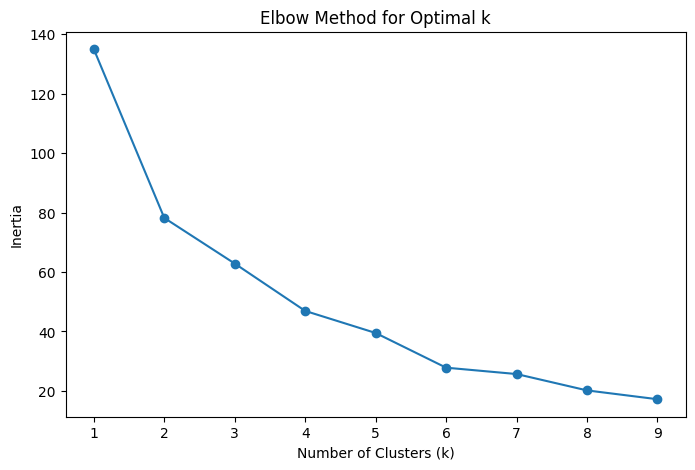

Cluster labels saved to: /content/drive/My Drive/PB310/Cluster_Labels.xlsx


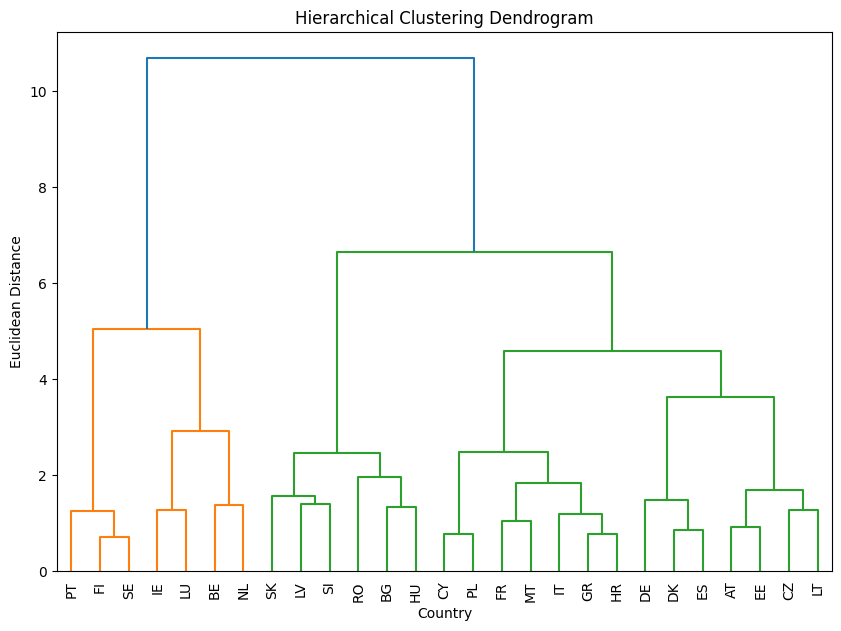

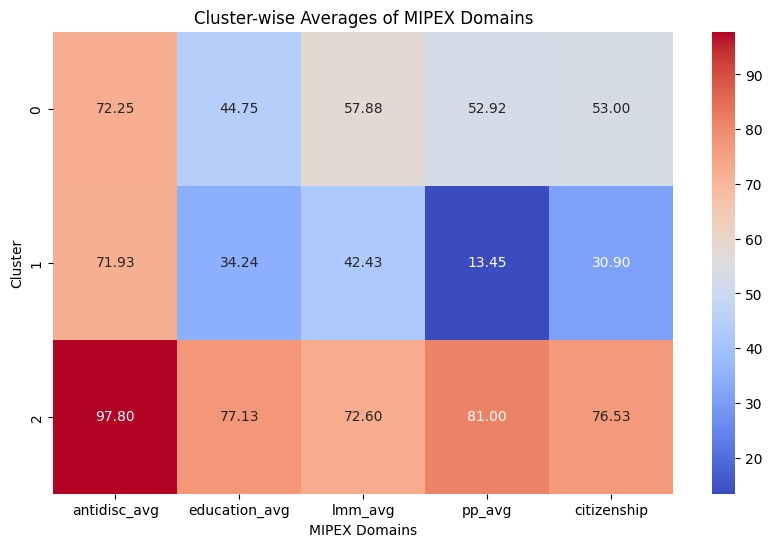

Clusters with high antidiscrimination policy scores: [2 1 0]

Cluster 2 Summary:
       antidisc_avg  education_avg    lmm_avg     pp_avg  citizenship
count       5.00000       5.000000   5.000000   5.000000     5.000000
mean       97.80000      77.133333  72.600000  81.000000    76.533333
std         4.91935      13.086465  25.948025  10.839742     7.309051
min        89.00000      61.666667  35.000000  65.000000    65.000000
25%       100.00000      69.000000  56.000000  80.000000    74.000000
50%       100.00000      74.000000  87.000000  80.000000    79.000000
75%       100.00000      88.000000  91.000000  85.000000    81.666667
max       100.00000      93.000000  94.000000  95.000000    83.000000

Cluster 1 Summary:
       antidisc_avg  education_avg    lmm_avg     pp_avg  citizenship
count     14.000000      14.000000  14.000000  14.000000    14.000000
mean      71.928571      34.238095  42.428571  13.452381    30.904762
std       17.503689      18.026300  14.601504   8.018789   

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

##This is an exploratory study undertaken based on previous results. Here, I'm trying to understand if there's any similarities or distinctions between countries on policy scores.
### Since the exploratory analysis yeilded an interesting policy imbalance, it would be worth exploring it by seeing if any clusters form, and if those are significant.

# Loading the MIPEX dataset
mipex_path = '/content/drive/My Drive/PB310/Aggregated-MIPEX.xlsx'
mipex_data = pd.read_excel(mipex_path)

# Select relevant features and normalize
features = ['antidisc_avg', 'education_avg', 'lmm_avg', 'pp_avg', 'citizenship']
mipex_features = mipex_data[features]

# Normalising
scaler = StandardScaler()
mipex_normalized = scaler.fit_transform(mipex_features)

# K-means clustering
# Here, I decided to use the elbow method to determine optimal number of clusters, as it is pretty effective and easy to interpret
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mipex_normalized)
    inertia.append(kmeans.inertia_)

# elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow plot, we see that the drop evens out at 3 (the drop is stil comparatively steep at 2!) So we take k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
mipex_data['Cluster'] = kmeans.fit_predict(mipex_normalized)

# Save cluster labels for future use
cluster_labels_path = '/content/drive/My Drive/PB310/Cluster_Labels.xlsx'
mipex_data[['country_code', 'Cluster']].to_excel(cluster_labels_path, index=False)
print(f"Cluster labels saved to: {cluster_labels_path}")

# Hierarchical clustering
linked = linkage(mipex_normalized, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=mipex_data['country_code'].values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Euclidean Distance')
plt.show()

# Next, once we identified clusters, it's good to see how they turn out using a dendrogram.
# Calculate cluster-wise averages for each domain
cluster_summary = mipex_data.groupby('Cluster')[features].mean()

# Heatmap of cluster-wise averages
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cluster-wise Averages of MIPEX Domains')
plt.ylabel('Cluster')
plt.xlabel('MIPEX Domains')
plt.show()

# Identify clusters with high antidisc_avg and analyze other domains
high_antidisc_clusters = mipex_data[mipex_data['antidisc_avg'] > mipex_data['antidisc_avg'].median()]['Cluster'].unique()
print("Clusters with high antidiscrimination policy scores:", high_antidisc_clusters)

# Compare other domains in these clusters
for cluster in high_antidisc_clusters:
    print(f"\nCluster {cluster} Summary:")
    print(mipex_data[mipex_data['Cluster'] == cluster][features].describe())

# Merge cluster labels with the combined dataset
combined_data_path = '/content/drive/My Drive/PB310/Final_Combined_Dataset_with_MIPEX_Aggregated.xlsx'
combined_data = pd.read_excel(combined_data_path)
combined_data_with_clusters = combined_data.merge(mipex_data[['country_code', 'Cluster']], on='country_code', how='left')

# Save the merged dataset
output_path = '/content/drive/My Drive/PB310/Combined_Dataset_with_Clusters.xlsx'
combined_data_with_clusters.to_excel(output_path, index=False)
print(f"Merged dataset with clusters saved to: {output_path}")


In [ ]:
# Overall, we see that the low cutoff for the Dendrogram and the elbow point both arrive at 3, confirming that it is a safe number to proceed with.

# Next, it's useful to see what countries are in in each cluster
for cluster in sorted(mipex_data['Cluster'].unique()):
    print(f"Countries in Cluster {cluster}:")
    countries = mipex_data[mipex_data['Cluster'] == cluster]['country_code']
    print(countries.tolist())
    print("\n")

Countries in Cluster 0:
['DE', 'DK', 'ES', 'FR', 'IE', 'IT', 'MT', 'NL']


Countries in Cluster 1:
['AT', 'BG', 'CY', 'CZ', 'EE', 'GR', 'HR', 'HU', 'LT', 'LV', 'PL', 'RO', 'SI', 'SK']


Countries in Cluster 2:
['BE', 'FI', 'LU', 'PT', 'SE']




#### A3. Section 2: Validating Clusters

In [ ]:
## After seeing interesting grouping patters, it is useful to see if this clustering can actually be mapped onto public sentiments and political rhetoric.
## This would be both interesting to study, and help in understanding our RQ better.

# Load the combined dataset
combined_data_path = '/content/drive/My Drive/PB310/Final_Combined_Dataset_with_MIPEX_Aggregated.xlsx'
combined_data = pd.read_excel(combined_data_path)

# Load the clustering results (from the clustering analysis)
cluster_labels_path = '/content/drive/My Drive/PB310/Cluster_Labels.xlsx'
cluster_labels = pd.read_excel(cluster_labels_path)

# Merge cluster labels into the combined dataset
combined_data_with_clusters = combined_data.merge(cluster_labels, on='country_code', how='left')

# Save
output_path = '/content/drive/My Drive/PB310/Combined_Dataset_with_Clusters.xlsx'
combined_data_with_clusters.to_excel(output_path, index=False)
print(f"Merged dataset with clusters saved to: {output_path}")


Merged dataset with clusters saved to: /content/drive/My Drive/PB310/Combined_Dataset_with_Clusters.xlsx


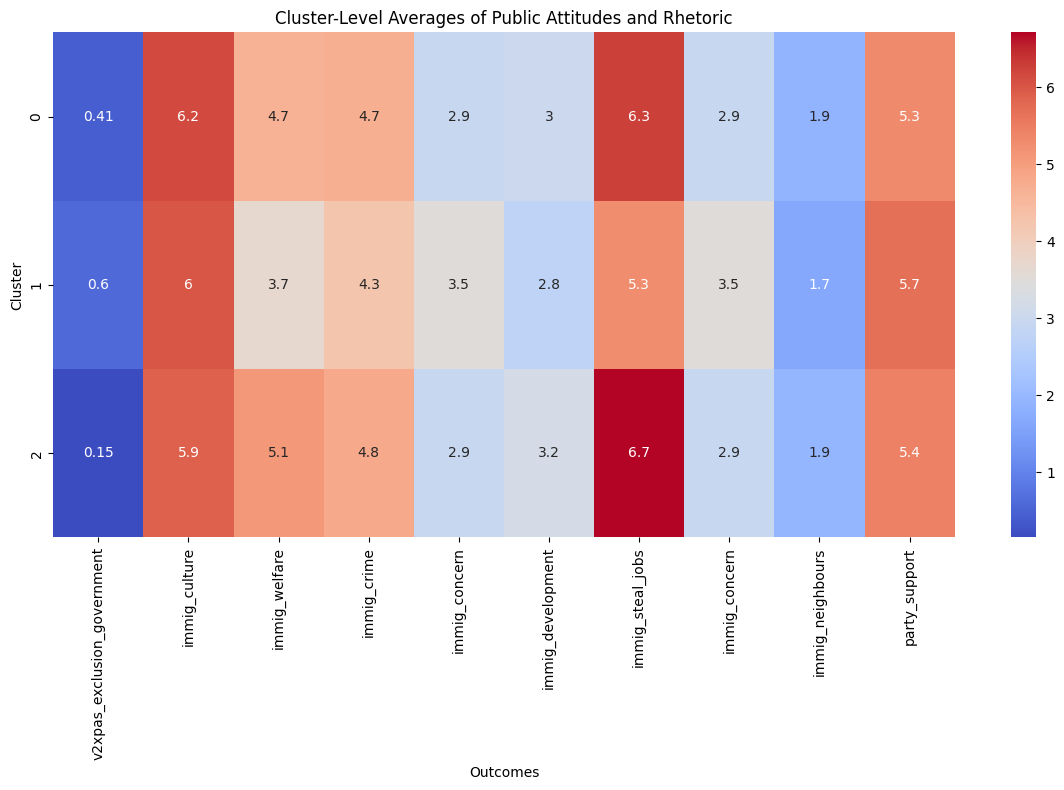

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the outcomes to visualize (all our variables)
outcomes = ['v2xpas_exclusion_government', 'immig_culture', 'immig_welfare',
            'immig_crime', 'immig_concern', 'immig_development', 'immig_steal_jobs', 'immig_concern', 'immig_neighbours', 'party_support']

import numpy as np

# Aggregate data for heatmap
cluster_means = combined_data_with_clusters.groupby('Cluster')[outcomes].mean()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', cbar=True)
plt.title("Cluster-Level Averages of Public Attitudes and Rhetoric")
plt.xlabel("Outcomes")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

## NB: some variables are reverse-scored

<ipython-input-11-a36274756a71>:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster", loc='best')


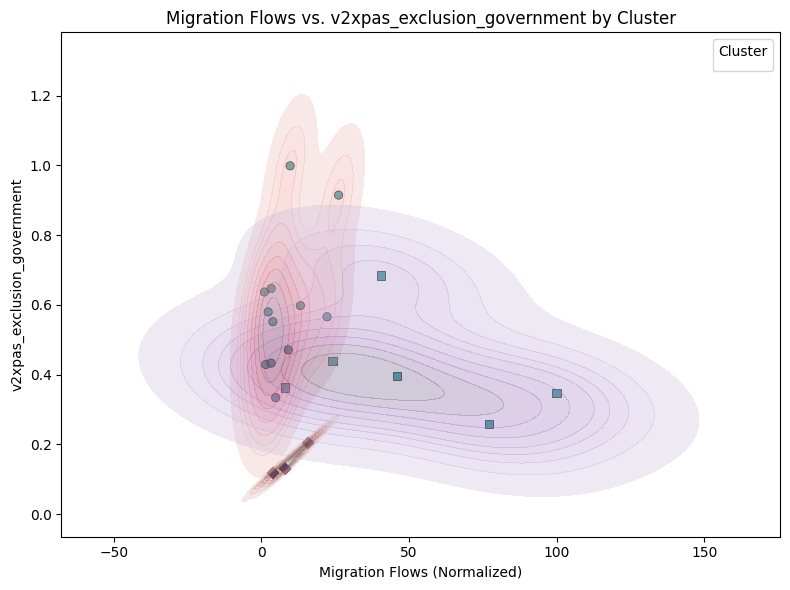

<ipython-input-11-a36274756a71>:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster", loc='best')


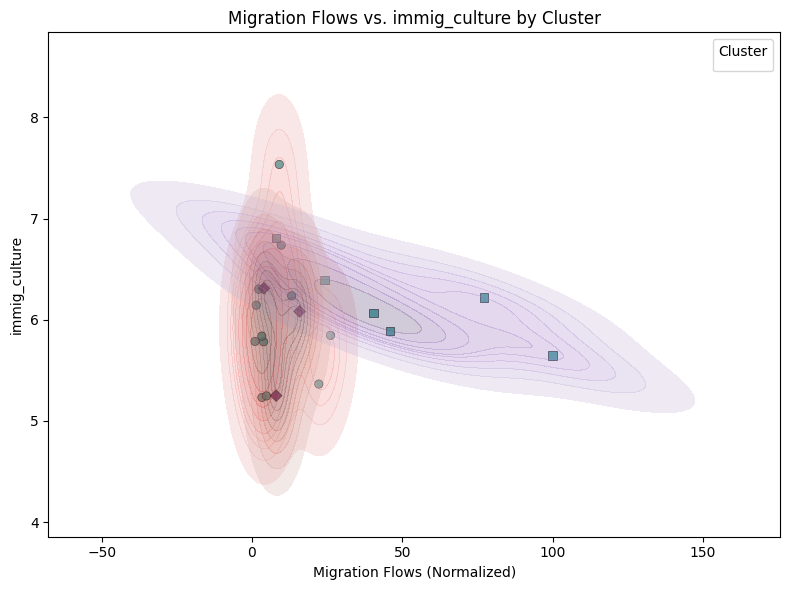

<ipython-input-11-a36274756a71>:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster", loc='best')


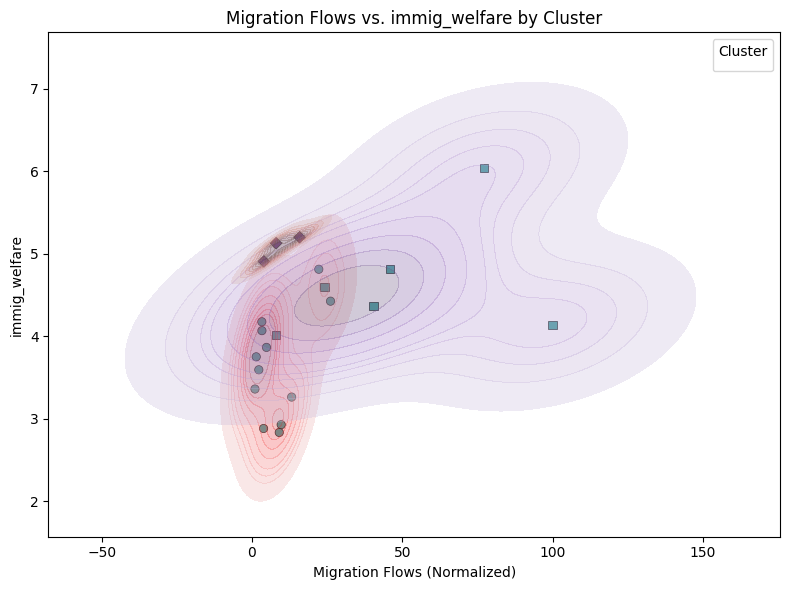

<ipython-input-11-a36274756a71>:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster", loc='best')


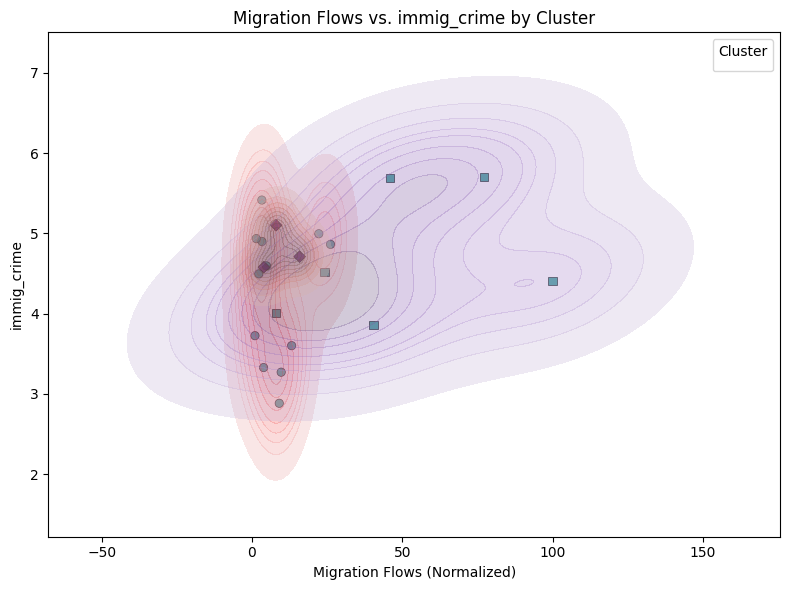

<ipython-input-11-a36274756a71>:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster", loc='best')


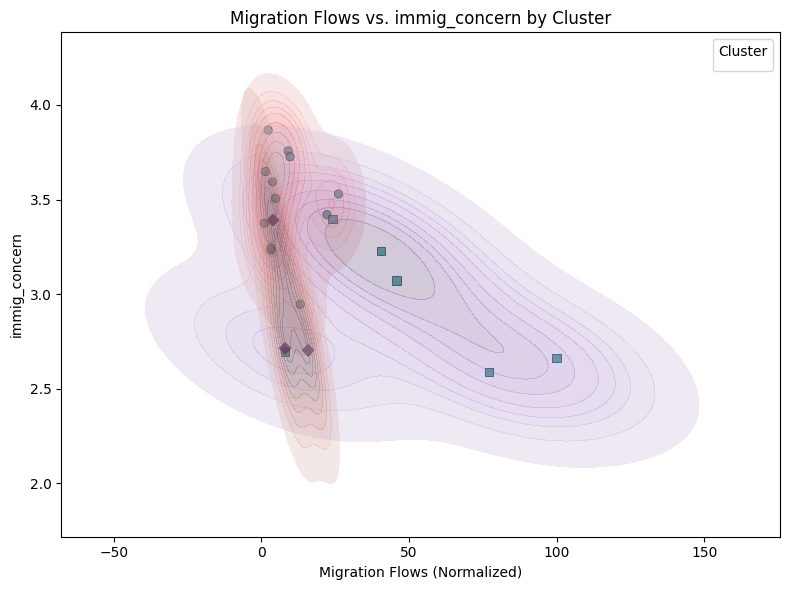

<ipython-input-11-a36274756a71>:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster", loc='best')


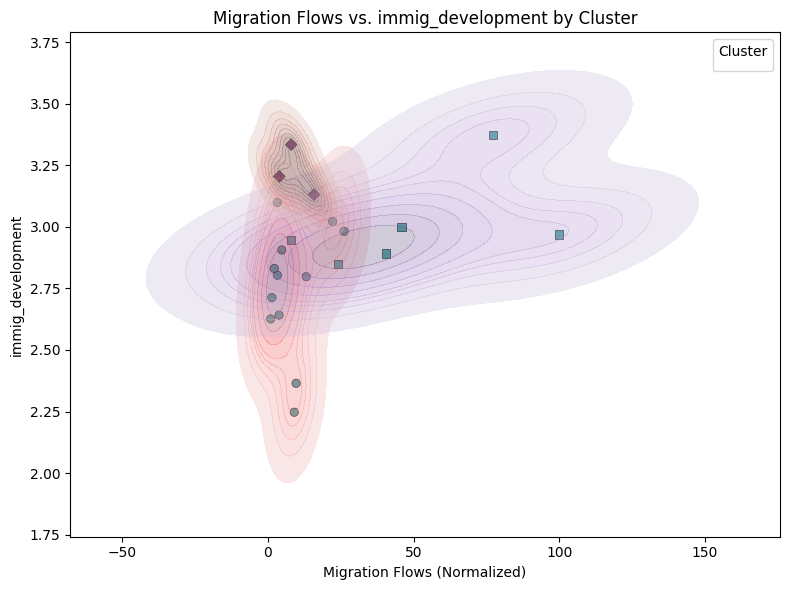

<ipython-input-11-a36274756a71>:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster", loc='best')


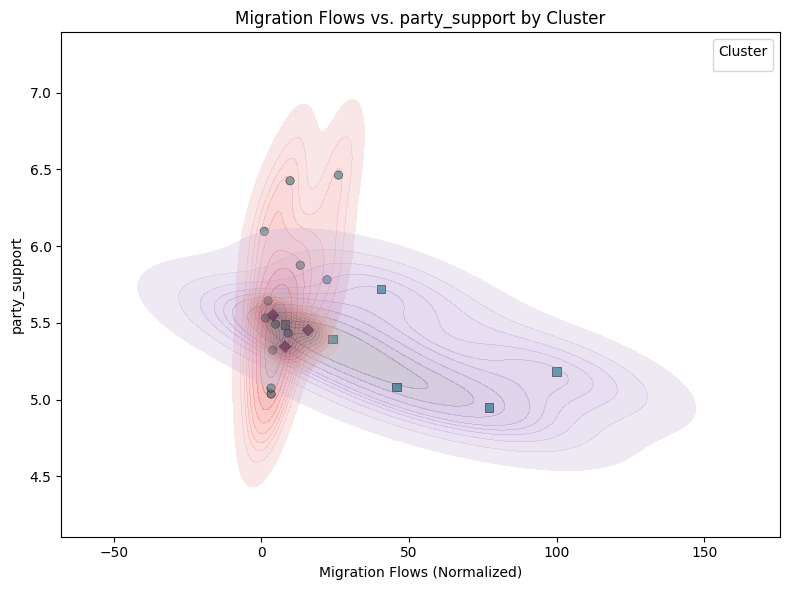

In [ ]:
## NON-FINAL Exploratory Code

## I wanted to see if scatter plots for clusters was a reasonable visualisation method. The figures don't seem too clear, but the code is included here to keep record of study progress.

# Define outcomes for the analysis
outcomes = [
    'v2xpas_exclusion_government',
    'immig_culture', 'immig_welfare', 'immig_crime',
    'immig_concern', 'immig_development', 'party_support'
]

# Define marker styles for clusters
cluster_markers = ['o', 's', 'D', 'P']

# Create scatter plots with distinct markers for clusters
for outcome in outcomes:
    plt.figure(figsize=(8, 6))

    # Scatterplot for data points with unique markers for each cluster
    for i, cluster in enumerate(combined_data_with_clusters['Cluster'].unique()):
        cluster_data = combined_data_with_clusters[combined_data_with_clusters['Cluster'] == cluster]
        sns.scatterplot(
            data=cluster_data,
            x='avg_immigration_2017_2019_normalized',
            y=outcome,
            hue='Cluster',
            palette='viridis',
            marker=cluster_markers[i % len(cluster_markers)],  # Cycle through markers
            alpha=0.8,
            edgecolor='black',  # Add contrast to scatter points
            linewidth=0.5,
            legend=False
        )

    # Add KDE plot for shading clusters
    for cluster in combined_data_with_clusters['Cluster'].unique():
        cluster_data = combined_data_with_clusters[combined_data_with_clusters['Cluster'] == cluster]
        sns.kdeplot(
            data=cluster_data,
            x='avg_immigration_2017_2019_normalized',
            y=outcome,
            levels=10,
            alpha=0.3,
            fill=True,
            label=f"Cluster {cluster}"
        )

    # Add plot titles and labels
    plt.title(f"Migration Flows vs. {outcome} by Cluster")
    plt.xlabel("Migration Flows (Normalized)")
    plt.ylabel(outcome)
    plt.legend(title="Cluster", loc='best')
    plt.tight_layout()
    plt.show()


##### Post-Hoc Confirmatory Kruskal-Wallis and ANOVA tests

In [ ]:
# With the clusters in the previous analysis seeming to map onto government rhetoric and individual sentiments, it is crucial to confirm if these clusters are indeed statistically significant.
## I employ both a one-way ANOVA and a Kruskal-Wallis test to study statistical significance.

from scipy.stats import f_oneway, kruskal

# Load the combined dataset with clusters
combined_data_path = '/content/drive/My Drive/PB310/Combined_Dataset_with_Clusters.xlsx'
combined_data_with_clusters = pd.read_excel(combined_data_path)

# outcomes and clusters for statistical testing
outcomes = ['v2xpas_exclusion_government', 'immig_culture', 'immig_welfare',
            'immig_crime', 'immig_concern', 'immig_development',
            'immig_steal_jobs', 'immig_neighbours', 'party_support']
clusters = combined_data_with_clusters['Cluster'].unique()

## Tests
anova_results = {}
kruskal_results = {}

for outcome in outcomes:
    # Prepare data grouped by clusters
    data_by_cluster = [combined_data_with_clusters[combined_data_with_clusters['Cluster'] == cluster][outcome].dropna()
                       for cluster in clusters]

    #  ANOVA
    anova_results[outcome] = f_oneway(*data_by_cluster)

    #  Kruskal-Wallis test
    kruskal_results[outcome] = kruskal(*data_by_cluster)

# Making them into a DataFrame for easier viewing and retrieveing later
anova_df = pd.DataFrame({
    'Outcome': outcomes,
    'ANOVA F-statistic': [anova_results[outcome].statistic for outcome in outcomes],
    'ANOVA p-value': [anova_results[outcome].pvalue for outcome in outcomes],
    'Kruskal-Wallis H-statistic': [kruskal_results[outcome].statistic for outcome in outcomes],
    'Kruskal-Wallis p-value': [kruskal_results[outcome].pvalue for outcome in outcomes]
})

anova_df.to_excel('/content/drive/My Drive/PB310/Statistical_Significance_Results.xlsx', index=False)

# Print  results
print(anova_df)

## Results indicate that the clusters are statistically significant for all variables except immigration_culture and immigration_crime. Interpretations could be made at the discussion stage of the project
## this exploratory segment could also be explored further

                       Outcome  ANOVA F-statistic  ANOVA p-value  \
0  v2xpas_exclusion_government           8.909808       0.002043   
1                immig_culture           0.276594       0.761527   
2                immig_welfare           8.707550       0.002263   
3                  immig_crime           0.972492       0.397145   
4                immig_concern           8.548046       0.002455   
5            immig_development           6.284019       0.008512   
6             immig_steal_jobs           6.361857       0.008132   
7             immig_neighbours          12.173455       0.000453   
8                party_support           1.904489       0.177719   

   Kruskal-Wallis H-statistic  Kruskal-Wallis p-value  
0                    9.961039                0.006870  
1                    0.893939                0.639563  
2                   10.909091                0.004277  
3                    1.344156                0.510646  
4                    9.870130          

#END